In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.pulse import frequency_offset

0.0008363520000000001


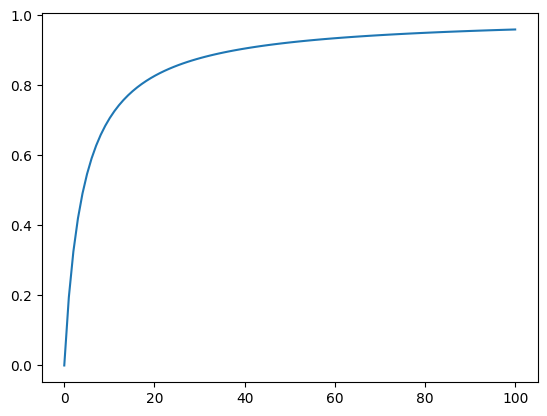

In [330]:
n_dot = np.linspace(0,100,100)
def photon_conversion_coupling(gamma, kappa, g, n_dot):
    delta_ab = np.sqrt(4*t**2+(0.8*wr)**2)-wr
    gamma_2 = gamma/2
    m = delta_ab**2+gamma_2**2
    G = compute_G(g, gamma)*100000
    chi_rho = 1/(delta_ab-1j*gamma_2)
    chi_ab = np.sqrt(kappa)/(-1j*kappa/2-g**2*chi_rho)
    absolute_chi_ab = abs(chi_ab)**2
    cavity_photon = absolute_chi_ab*n_dot
    print(G)
    delta_mz = 1*(G*cavity_photon)/(1+G*cavity_photon)
    current = 1*delta_mz
    return current
plt.plot(n_dot, photon_conversion_coupling(gamma,kappa,g,n_dot))
plt.show()

In [553]:
p_in = np.linspace(0.00,0.042, 100)
wr = 4
n_dot = p_in*10**-15/(10**18*wr*6.626*10**-34)
K = -0.0001
gamma = 0.5
kappa = 0.014
kc = 0.013
t = 1.1
g0 = 0.100
g = g0 * 2 * t / wr
gamma_r = 0.03 * 2 * np.pi



def compu_G(photon, cross_kerr):
    return 4*g**2/((gamma+cross_kerr*photon**2)**2+gamma)

def photon_conversion_coupling(gamma, kappa, g, n_dot, K):
    delta_rho_b = np.sqrt(4 * t ** 2 + (0.8 * wr) ** 2) - wr
    gamma_2 = gamma / 2
    chi_rho = 1 / (delta_rho_b - 1j * gamma_2)
    roots = []
    currents = []
    for i in range(len(n_dot)):
        effective_g = g
        y = np.polynomial.Polynomial([-kappa*n_dot[i],-(1j*(kappa)/2+effective_g**2*chi_rho)*(1j*kappa/2-effective_g**2*np.conj(chi_rho)), (2*effective_g**4*(1j*chi_rho).real)*K,(K)**2])
        root = np.max((y.roots().real))
        roots.append(root)
    return roots

/var/folders/0x/61cppml13m3_585zg8q3279w0000gn/T/ipykernel_13677/1204995331.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  currents.append(1 / (1 + 1 / (G*photon[i])) * gamma * 10 ** 9 *10 ** -19 * 1.602)
/var/folders/0x/61cppml13m3_585zg8q3279w0000gn/T/ipykernel_13677/1204995331.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  efficiency.append(1 / (1 + 1 / (G*photon[i])) * gamma * 10 ** 9/(n_dot[i]*10**9))
/var/folders/0x/61cppml13m3_585zg8q3279w0000gn/T/ipykernel_13677/1204995331.py:15: RuntimeWarning: invalid value encountered in scalar divide
  efficiency.append(1 / (1 + 1 / (G*photon[i])) * gamma * 10 ** 9/(n_dot[i]*10**9))


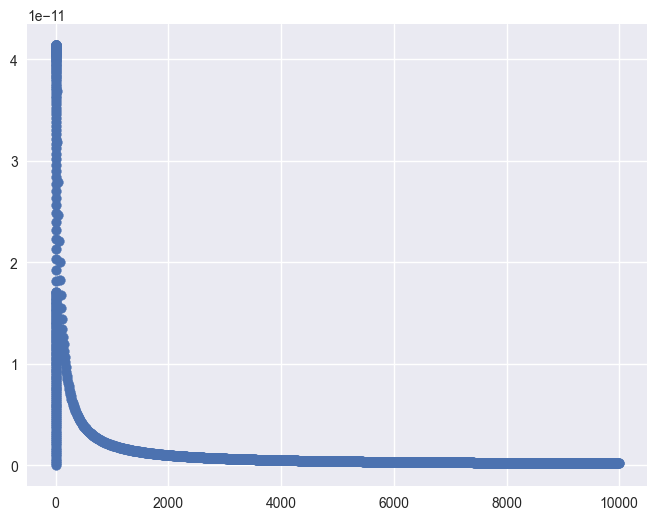

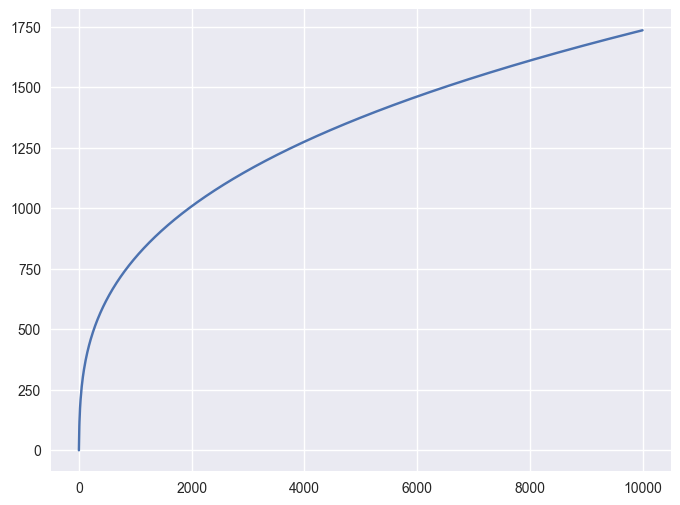

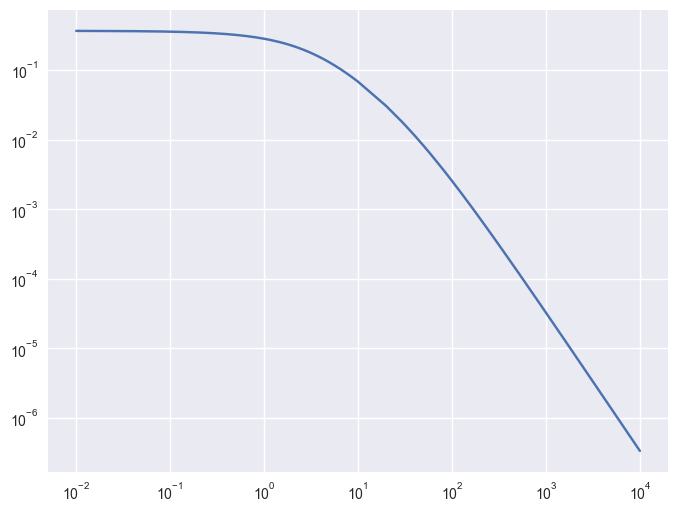

In [554]:
p_in = np.linspace(0,1, 100)
p_in_2 = np.linspace(1, 10,100)
p_in_3 = np.linspace(10, 10000,1000)
p_in_total = np.hstack((p_in, p_in_2, p_in_3))
wr = 4
n_dot = p_in_total*10**-15/(10**18*wr*6.626*10**-34)
cavity_photon = photon_conversion_coupling(gamma, kappa, g, n_dot, K)

def current(photon, gamma):
    currents = []
    efficiency = []
    for i in range(len(photon)):
        G = compu_G(photon[i], 0.00003)
        currents.append(1 / (1 + 1 / (G*photon[i])) * gamma * 10 ** 9 *10 ** -19 * 1.602)
        efficiency.append(1 / (1 + 1 / (G*photon[i])) * gamma * 10 ** 9/(n_dot[i]*10**9))
    return currents, efficiency

currents_2, efficiency = current(cavity_photon, gamma)
plt.plot()
#plt.plot(photon, cavity_photon)
plt.scatter(p_in_total, currents_2)
plt.show()
plt.plot(p_in_total, cavity_photon)
plt.show()
plt.plot(p_in_total, efficiency)
plt.xscale('log')
plt.yscale('log')
plt.show()
#plt.plot(photon,currents_2)

In [79]:
from scipy import constants as const
import numpy as np
import matplotlib.pyplot as plt
def get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi, freq_unit='GHz'):
    f_scale = 10**9
    roots = []
    for pwr in power:
        alpha_in = np.sqrt(pwr/(const.h*fr)) / f_scale
        denom = kappa + gamma_phi
        delta_c_corr = (fr - fdrive + self_Kerr) / denom
        alpha_in_tilde = np.sqrt(kappa_c) * alpha_in / denom
        ksi = self_Kerr * abs(alpha_in_tilde)**2 / denom
        gamma_phi_tilde = gamma_phi * abs(alpha_in_tilde)**2 / denom

        p = [0]*4
        p[0] = -1
        p[1] = 1/4 + delta_c_corr**2
        p[2] = 2*ksi*delta_c_corr + gamma_phi_tilde
        p[3] = gamma_phi_tilde**2 + ksi**2
        poly = np.polynomial.Polynomial(p)
        roots.append(max(poly.roots().real) * abs(alpha_in_tilde)**2)
    return np.array(roots)

def photon_conversion(w, wa, K, ki, kc, n_dot):
    # Convert all inputs to numpy arrays to handle element-wise operations
    wa = np.asarray(wa)
    w = np.asarray(w)
    K = np.asarray(K)
    ki = np.asarray(ki)
    kc = np.asarray(kc)
    #dephase = np.asarray(dephase)
    n_dot = np.asarray(n_dot)

    # Intermediate calculations
    delta = (w - wa) / (ki + kc)
    alpha_norm = np.sqrt(kc * n_dot) / (ki + kc)
    sigma = alpha_norm**2 * K / (ki + kc)

    # Cubic equation coefficients
    a = sigma**2
    b = -2 * sigma * delta
    c = 1/4 + delta**2
    d = -np.ones_like(a)  # Ensure d is array with correct shape

    # Depressed cubic coefficients
    p = (3 * a * c - b**2) / (3 * a**2)
    q = (2 * b**3 - 9 * a * b * c + 27 * a**2 * d) / (27 * a**3)
    D = (q / 2)**2 + (p / 3)**3

    # Initialize result array
    n = np.zeros_like(D)

    # Case 1: D >= 0 (one real root)
    mask_real = D >= 0
    if np.any(mask_real):
        q_masked = q[mask_real]
        D_masked = D[mask_real]
        sqrt_D = np.sqrt(D_masked)
        term1 = np.cbrt(-q_masked/2 + sqrt_D)
        term2 = np.cbrt(-q_masked/2 - sqrt_D)
        n[mask_real] = -b[mask_real]/(3*a[mask_real]) + term1 + term2

    # Case 2: D < 0 (three real roots, using k=1)
    mask_complex = D < 0
    if np.any(mask_complex):
        p_masked = p[mask_complex]
        q_masked = q[mask_complex]

        # Calculate angle components
        with np.errstate(invalid='ignore'):  # Suppress temporary invalid warnings
            arg_arccos = (-q_masked / 2) * np.sqrt(-27 / p_masked**3)

        theta = np.arccos(np.clip(arg_arccos, -1, 1))  # Ensure valid arccos input
        k = 1
        angle = theta / 3 - 2 * np.pi * (k - 1) / 3
        n[mask_complex] = np.max(2 * np.sqrt(-p_masked / 3) * np.cos(angle))
        
    # Calculate final photon number
    resonator_photon = n * alpha_norm**2

    # Return scalar if input was scalar
    if np.isscalar(w) and np.isscalar(resonator_photon):
        return float(resonator_photon)
    
    return resonator_photon # old


def photocurrent_nonlinear(power, fdrive, fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax):
    f_scale = 10**9
    Gamma_out = Gamma_R
    delta_c = fr - fdrive
    delta_per_fr = -np.sqrt(1 - (2*tc / fr)**2)
    Gamma_0e = (Gamma_L + Gamma_R) + (Gamma_L - Gamma_R)*delta_per_fr
    Gamma_g0 = (Gamma_L + Gamma_R)*0.5 - (Gamma_L - Gamma_R)*delta_per_fr*0.5
    Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)
    Gamma_2 = (gamma_relax + Gamma_0e) / 2
    nc = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
    n_dot = power/(const.h*fr*10**18)
    nc = photon_conversion(fr, fr, self_Kerr, kappa-kappa_c, kappa_c, n_dot)
    g_eff = g0 * 2*tc/fr
    g_eff = g0 * 2*tc/fr*(np.sqrt((fr+nc*self_Kerr)/fr))
    print(g_eff)
    print(fr+self_Kerr*nc*2-fr)
    print('scale,', g_eff/(fr+self_Kerr*nc*2-fr))
    G = 4*g_eff**2 * Gamma_2 / (Gamma_1 * (delta_c + cross_Kerr *nc**2)**2 + Gamma_2**2)
    m_z = -1/(1 + G*nc)

    return const.e * Gamma_out/2*np.pi * (1+m_z) / (Gamma_0e+2*Gamma_g0) * (Gamma_0e * (1-delta_per_fr) - Gamma_g0 * (1+delta_per_fr)) * f_scale

In [551]:
power = np.linspace(0, 200e-15, 100)
fdrive = 3.65
fr = fdrive
kappa = 0.02766
kappa_c = 0.0226
self_Kerr = -1.3e-3
cross_Kerr = 0.0e-3
gamma_phi_kerr = 0.000e-3
Gamma_L = 3.5
Gamma_R = 3.5
gamma_relax = 0.03
g0 = 0.08
tc = 1
photocurrent = photocurrent_nonlinear(power, fdrive, fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax)
#plt.plot(power,get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, 0.001, freq_unit='GHz' ))
plt.plot(power*1e15, photocurrent*1e12)
print(photocurrent[-1])

TypeError: photocurrent_nonlinear() missing 1 required positional argument: 'gamma_relax'

In [593]:
from scipy import constants as const
import numpy as np
import matplotlib.pyplot as plt
def get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi, freq_unit='GHz'):
    f_scale = 10**9
    roots = []
    for pwr in power:
        alpha_in = np.sqrt(pwr/(const.h*fr)) / f_scale
        denom = kappa + gamma_phi
        delta_c_corr = (fr - fdrive + self_Kerr) / denom
        alpha_in_tilde = np.sqrt(kappa_c) * alpha_in / denom
        ksi = self_Kerr * abs(alpha_in_tilde)**2 / denom
        gamma_phi_tilde = gamma_phi * abs(alpha_in_tilde)**2 / denom

        p = [0]*4
        p[0] = -1
        p[1] = 1/4 + delta_c_corr**2
        p[2] = 2*ksi*delta_c_corr + gamma_phi_tilde
        p[3] = gamma_phi_tilde**2 + ksi**2
        poly = np.polynomial.Polynomial(p)
        roots.append(max(poly.roots().real) * abs(alpha_in_tilde)**2)
    return np.array(roots)

def photocurrent_nonlinear(power, fdrive, fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax):
    f_scale = 10**9
    Gamma_out = Gamma_R
    delta_c = fr - fdrive
    delta_per_fr = -np.sqrt(1 - (2*tc / fr)**2)
    Gamma_0e = (Gamma_L + Gamma_R) + (Gamma_L - Gamma_R)*delta_per_fr
    Gamma_g0 = (Gamma_L + Gamma_R)*0.5 - (Gamma_L - Gamma_R)*delta_per_fr*0.5
    Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)
    Gamma_2 = (gamma_relax + Gamma_0e) / 2
    nc = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
    g_eff = g0 * 2*tc/fr
    #g_eff = g0 * 2*tc/fr*(np.sqrt((fr+nc*2*self_Kerr)/fr))
    G = 4*g_eff**2 * Gamma_2 / (Gamma_1 * ((delta_c + cross_Kerr *nc**2)**2 + Gamma_2**2))
    m_z = -1/(1 + G*nc)

    return const.e * Gamma_out/2*np.pi * (1+m_z) / (Gamma_0e+2*Gamma_g0) * (Gamma_0e * (1-delta_per_fr) - Gamma_g0 * (1+delta_per_fr)) * f_scale

3.300421823646105e-11


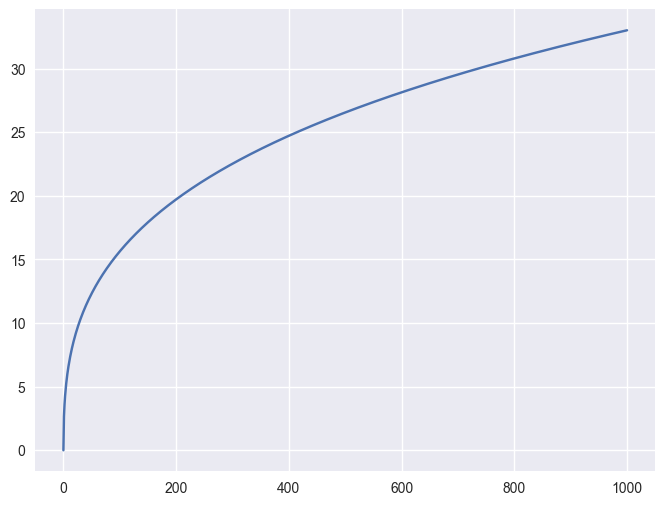

In [596]:
power = np.linspace(0, 1000e-15, 1000)
fdrive = 3.65
fr = fdrive
kappa = 0.02766
kappa_c = 0.0226
self_Kerr = -0.03
cross_Kerr = 0.00e-3
gamma_phi_kerr = -0.00e-3
Gamma_L = 1.5
Gamma_R = 1.5
gamma_relax = 0.03
dot_dephasing = 0.003
g0 = 0.1
tc = 1
photocurrent = photocurrent_nonlinear(power, fdrive, fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax)
#plt.plot(power,get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, 0.001, freq_unit='GHz' ))
plt.plot(power*1e15, photocurrent*1e12)
print(photocurrent[-1])

In [178]:
from scipy import constants as const
import numpy as np
import matplotlib.pyplot as plt
def get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi, freq_unit='GHz'):
    f_scale = 10**9
    roots = []
    for pwr in power:
        alpha_in = np.sqrt(pwr/(const.h*fr)) / f_scale
        denom = kappa + gamma_phi
        delta_c_corr = (-fr + fdrive) / denom
        alpha_in_tilde = np.sqrt(kappa_c) * alpha_in / denom
        ksi = self_Kerr * abs(alpha_in_tilde)**2 / denom
        gamma_phi_tilde = gamma_phi * abs(alpha_in_tilde)**2 / denom

        p = [0]*4
        p[0] = -1
        p[1] = 1/4 + delta_c_corr**2
        p[2] = -2*ksi*delta_c_corr 
        p[3] = ksi**2
        poly = np.polynomial.Polynomial(p)
        roots.append(max(poly.roots().real) * abs(alpha_in_tilde)**2)
    return np.array(roots)

def photocurrent_nonlinear(power, fdrive, fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax):
    f_scale = 10**9
    Gamma_out = Gamma_R
    delta_c = fr - fdrive
    delta_per_fr = -np.sqrt(1 - (2*tc / fr)**2)
    Gamma_0e = (Gamma_L + Gamma_R) + (Gamma_L - Gamma_R)*delta_per_fr
    Gamma_g0 = (Gamma_L + Gamma_R)*0.5 - (Gamma_L - Gamma_R)*delta_per_fr*0.5
    Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)
    Gamma_2 = (gamma_relax + Gamma_0e) / 2
    nc = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
    g_eff = g0 * 2*tc/fr
    #g_eff = g0 * 2*tc/fr*(np.sqrt((fr+nc*2*self_Kerr)/fr))
    G = 4*g_eff**2*Gamma_2/ (Gamma_1 * ((delta_c)**2 + (Gamma_2)**2))
    m_z = -1/(1 + G*nc)
    return const.e * Gamma_out/2*np.pi * (1+m_z) / (Gamma_0e+2*Gamma_g0) * (Gamma_0e * (1-delta_per_fr) - Gamma_g0 * (1+delta_per_fr)) * f_scale

3.1752094612566023e-10


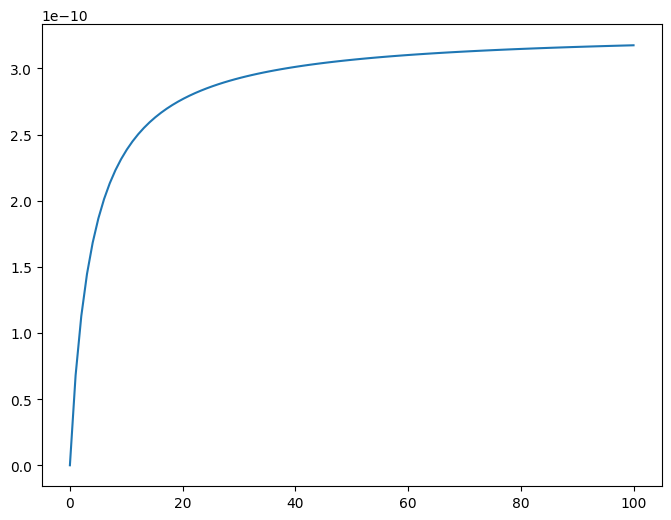

In [179]:
power = np.linspace(0.0000, 100e-15, 100)
fdrive = 3.65
fr = fdrive
kappa = 0.02766
kappa_c = 0.0226
self_Kerr = -0.001e-3
cross_Kerr =0.00e-3
gamma_phi_kerr = -0.00e-3
Gamma_L = 1.5
Gamma_R = 1.5
gamma_relax = 0.03
dot_dephasing = 0.003
g0 = 0.1
tc = 1
photocurrent = photocurrent_nonlinear(power, fdrive, fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax)
#plt.plot(power,get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, 0.001, freq_unit='GHz' ))
plt.plot(power*1e15, photocurrent)
print(photocurrent[-1])

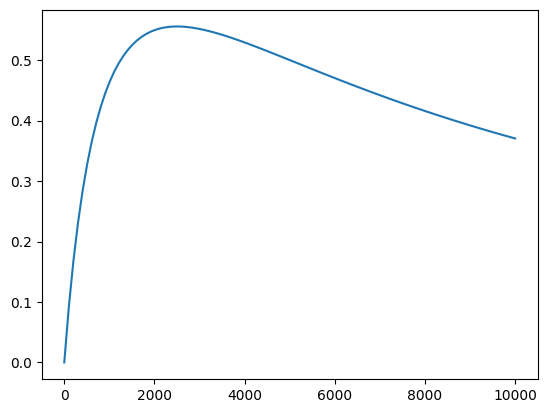

In [225]:
def fu(G, T2, photon):
    return G*photon/(1+T2**2*(photon)**2+G*photon)
photon_num = np.linspace(0,10000,100)
plt.plot(photon_num, fu(0.001, 0.0004, photon_num))
plt.show()

In [18]:
from scipy import constants as const
import numpy as np
import matplotlib.pyplot as plt

def get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi, freq_unit='GHz'):
    f_scale = 10**9
    roots = []
    for pwr in power:
        alpha_in = np.sqrt(pwr/(const.h*fr))/f_scale
        denom = kappa + gamma_phi
        delta_c_corr = (-fr + fdrive) / denom
        alpha_in_tilde = np.sqrt(kappa_c) * alpha_in / denom
        ksi = self_Kerr * abs(alpha_in_tilde)**2 / denom
        gamma_phi_tilde = gamma_phi * abs(alpha_in_tilde)**2 / denom
        p = [0]*4
        p[0] = -1
        p[1] = 1/4 + delta_c_corr**2
        p[2] = -2*ksi*delta_c_corr + gamma_phi_tilde
        p[3] = ksi**2 + gamma_phi_tilde**2
        poly = np.polynomial.Polynomial(p)
        roots.append(max(poly.roots().real) * abs(alpha_in_tilde)**2)
    return np.array(roots)

def photocurrent_nonlinear(power, fdrive, fr,fqubit, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax, dot_dephasing):
    nc = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
    f_scale = 10**9
    n_dot = power/(const.h*fr*10**18)
    delta_c = fr - fdrive
    epsilon = (fqubit**2-4*tc**2)**0.5
    cos_theta_2 = (1-epsilon/fqubit)/2 #cos(theta/2)^2
    sin_theta_2 = 1-cos_theta_2
    Gamma_0e = Gamma_L*cos_theta_2 + Gamma_R*sin_theta_2
    Gamma_g0 = Gamma_L*sin_theta_2 + Gamma_R*cos_theta_2
    Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)
    Gamma_2 = (gamma_relax + Gamma_0e) / 2
    cos_theta = -epsilon/(fqubit)
    g_eff = g0*np.sqrt(1-cos_theta**2)
    effective_Gamma_2 = (Gamma_2+nc**2*gamma_phi_kerr)*np.sqrt(1+n_dot/Gamma_2/Gamma_1)
    #effective_Gamma_2 = (Gamma_2)*np.sqrt(1+1000*n_dot/Gamma_2/Gamma_1)
    print(effective_Gamma_2)
    G = 4*g_eff**2*(effective_Gamma_2)/ (Gamma_1 * ((delta_c)**2 + (effective_Gamma_2)**2))
    #G = 4*g_eff**2*Gamma_2/ (Gamma_1 * ((delta_c)**2 + (Gamma_2)**2))*np.sqrt(nc)
    m_z = -1/(1 + G*nc)
    return const.e * Gamma_R * (1+m_z)/(2*np.pi) / (Gamma_0e+2*Gamma_g0) * (Gamma_0e * cos_theta_2 - Gamma_g0 * sin_theta_2) * f_scale*-1

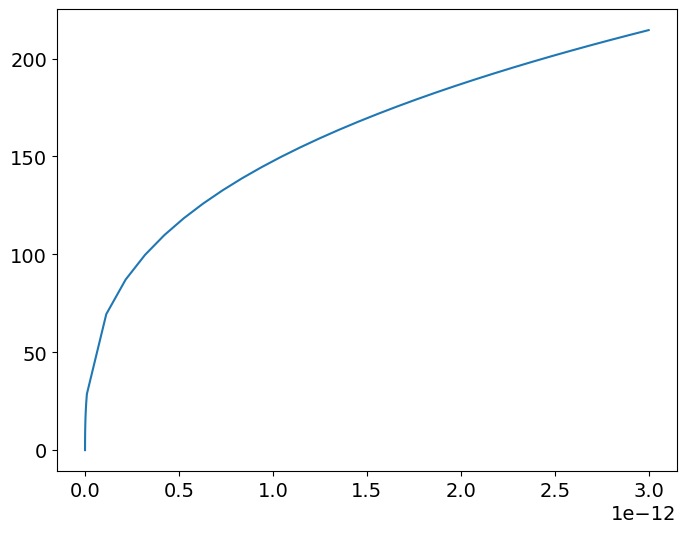

[   1.3           1.30575375    1.31324658    1.32144886    1.32998402
    1.3386854     1.34746953    1.35629111    1.36512414    1.37395314
    1.38276874    1.39156522    1.40033914    1.40908854    1.41781236
    1.42651021    1.43518208    1.44382825    1.45244918    1.46104544
    1.46961767    1.47816655    1.48669278    1.49519707    1.50368013
    1.51214264    1.52058527    1.52900867    1.53741349    1.54580031
    1.54580031    1.62056156    1.69425237    1.7671146     1.83931868
    1.91098899    1.98221922    2.05308192    2.12363455    2.19392351
    2.26398689    2.33385639    2.40355871    2.47311657    2.5425495
    2.6118744     2.68110603    2.75025731    2.81933969    2.88836328
    2.95733713    3.02626931    3.09516709    3.16403701    3.23288498
    3.30171639    3.3705361     3.43934857    3.50815786    3.57696769
    3.57696769   28.55778559   56.68218101   86.80164772  118.41310063
  151.23070759  185.06769753  219.79146002  255.30247569  291.52303127
  328.3

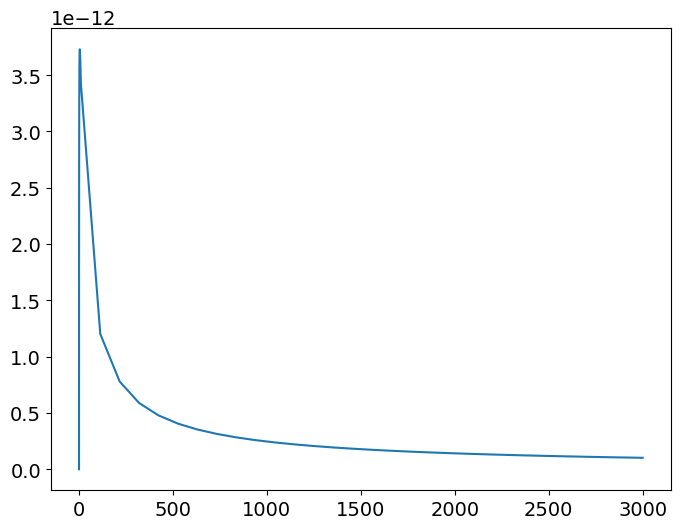

In [19]:
power = np.linspace(0, 1e-15, 30)
power_higher = np.linspace(1e-15, 10e-15, 30)
power_higherer = np.linspace(10e-15,3000e-15, 30)
power = np.hstack((power, power_higher, power_higherer))
fdrive = 3.65
fr = fdrive
kappa = 0.02866
kappa_c = 0.0236
self_Kerr = -0.00135
cross_Kerr = 0
gamma_phi_kerr = 0.001
Gamma_L = 2.5
Gamma_R = 2.5
gamma_relax = 0.100
dot_dephasing = 0.02
g0 = 0.20
tc = 1.05
cavity_photon_numebr = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
plt.plot(power, cavity_photon_numebr)
plt.show()
photocurrent = photocurrent_nonlinear(power, fdrive, fr,fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax, dot_dephasing)
plt.plot(power*1e15, photocurrent)

[   1.3           1.30575375    1.31324658    1.32144886    1.32998402
    1.3386854     1.34746953    1.35629111    1.36512414    1.37395314
    1.38276874    1.39156522    1.40033914    1.40908854    1.41781236
    1.42651021    1.43518208    1.44382825    1.45244918    1.46104544
    1.46961767    1.47816655    1.48669278    1.49519707    1.50368013
    1.51214264    1.52058527    1.52900867    1.53741349    1.54580031
    1.54580031    1.62056156    1.69425237    1.7671146     1.83931868
    1.91098899    1.98221922    2.05308192    2.12363455    2.19392351
    2.26398689    2.33385639    2.40355871    2.47311657    2.5425495
    2.6118744     2.68110603    2.75025731    2.81933969    2.88836328
    2.95733713    3.02626931    3.09516709    3.16403701    3.23288498
    3.30171639    3.3705361     3.43934857    3.50815786    3.57696769
    3.57696769   28.55778559   56.68218101   86.80164772  118.41310063
  151.23070759  185.06769753  219.79146002  255.30247569  291.52303127
  328.3

/var/folders/0x/61cppml13m3_585zg8q3279w0000gn/T/ipykernel_45397/1248923030.py:8: RuntimeWarning: invalid value encountered in scalar divide
  100*photocurrent[i] / (1.602e-19 * power[i] / (const.h * fr * 1e9))


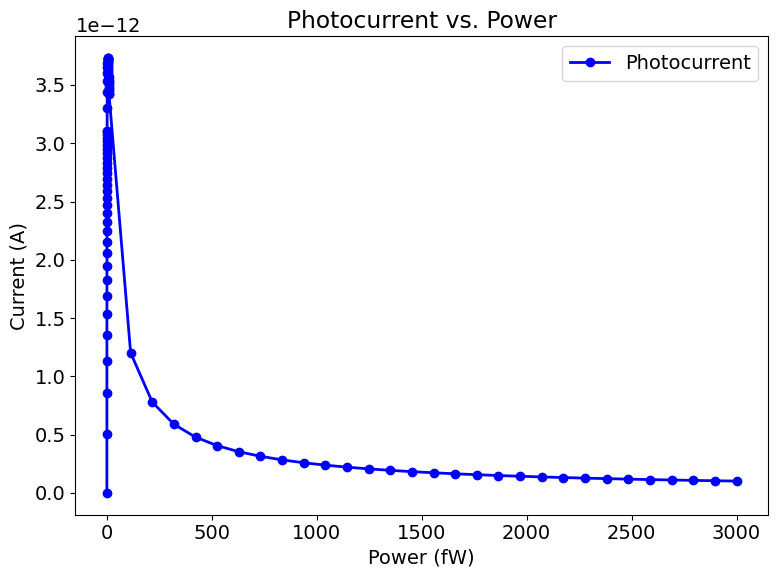

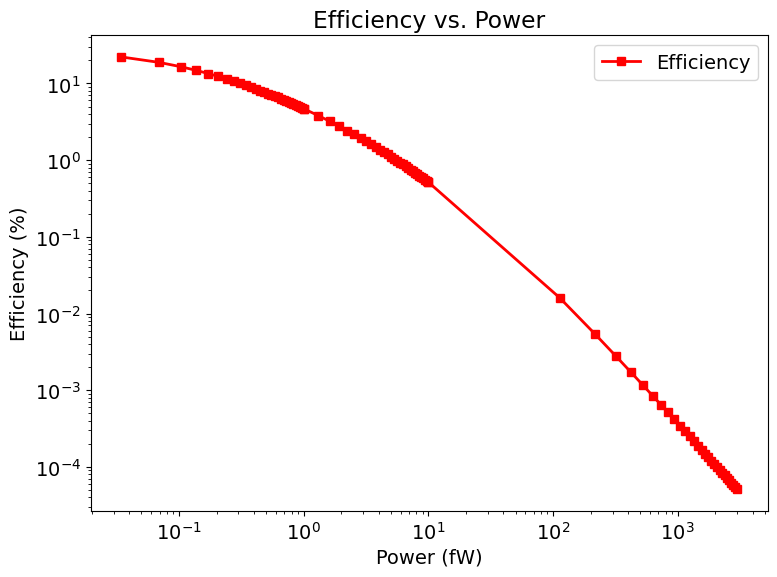

In [8]:
# Compute the photocurrent and efficiency
photocurrent = photocurrent_nonlinear(power, fdrive, fr,fr, kappa, kappa_c, 
                                      self_Kerr, cross_Kerr, gamma_phi_kerr, 
                                      Gamma_L, Gamma_R, g0, tc, gamma_relax,dot_dephasing)
print(photocurrent)
# Calculate efficiency (ensure const.hbar and fr are correctly defined)
efficiency = np.array([
    100*photocurrent[i] / (1.602e-19 * power[i] / (const.h * fr * 1e9))
    for i in range(len(photocurrent))
])

# Set a nice style and configure plot parameters
plt.rcParams.update({'font.size': 14, 'figure.figsize': (8, 6)})

# Plot 1: Photocurrent vs. Power
fig, ax = plt.subplots()
ax.plot(power * 1e15, photocurrent, marker='o', linestyle='-', linewidth=2, color='blue', label='Photocurrent')
ax.set_xlabel('Power (fW)')
ax.set_ylabel('Current (A)')
ax.set_title('Photocurrent vs. Power')
ax.legend()
plt.tight_layout()
plt.show()

# Plot 2: Efficiency vs. Power (Log-Log Scale)
fig, ax = plt.subplots()
ax.plot(power * 1e15, efficiency, marker='s', linestyle='-', linewidth=2, color='red', label='Efficiency')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Power (fW)')
ax.set_ylabel('Efficiency (%)')
ax.set_title('Efficiency vs. Power')
ax.legend()
plt.tight_layout()
plt.show()


[ 1.265       1.39126096  1.49999258  1.59251442  1.67243907  1.74288069
  1.8061052   1.86371616  1.91686047  1.96637611  2.01288958  2.05687966
  2.09871958  2.13870549  2.17707613  2.21402664  2.24971852  2.28428692
  2.3178461   2.35049345  2.38231272  2.41337644  2.44374783  2.47348235
  2.5026289   2.53123084  2.55932679  2.58695132  2.61413546  2.6409072
  2.6409072   2.8668165   3.07301019  3.26585415  3.44896278  3.62459347
  3.79425499  3.95900849  4.11963071  4.2767087   4.43069812  4.58196057
  4.73078849  4.87742228  5.0220624   5.16487809  5.30601384  5.44559421
  5.58372754  5.7205088   5.85602186  5.99034124  6.12353357  6.25565874
  6.38677086  6.516919    6.6461479   6.77449848  6.90200831  7.02871199
  7.02871199  7.58286722  8.1239933   8.65382848  9.1737159   9.68472428
 10.18772396 10.68343731 11.17247333 11.65535226 12.13252353 12.60437916
 13.07126399 13.53348366 13.99131077 14.44498997 14.89474193 15.34076666
 15.78324623 16.22234703 16.65822168 17.09101064 17.

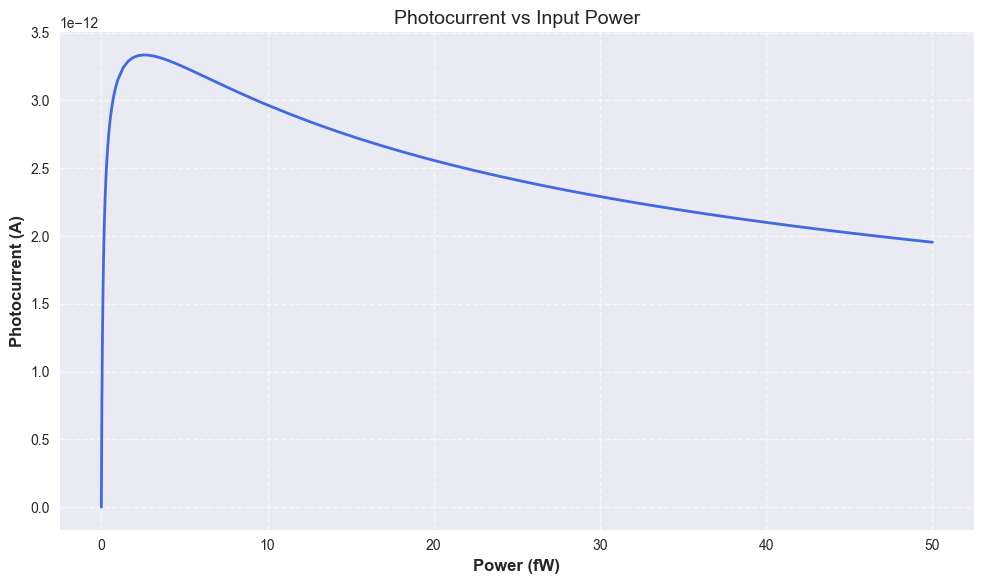

/var/folders/0x/61cppml13m3_585zg8q3279w0000gn/T/ipykernel_37213/2077963887.py:20: RuntimeWarning: invalid value encountered in scalar divide
  efficiency = [100*photocurrent[i] / (1.602e-19 * power[i] / (const.h * fr * 1e9))  # Added 100* for percentage


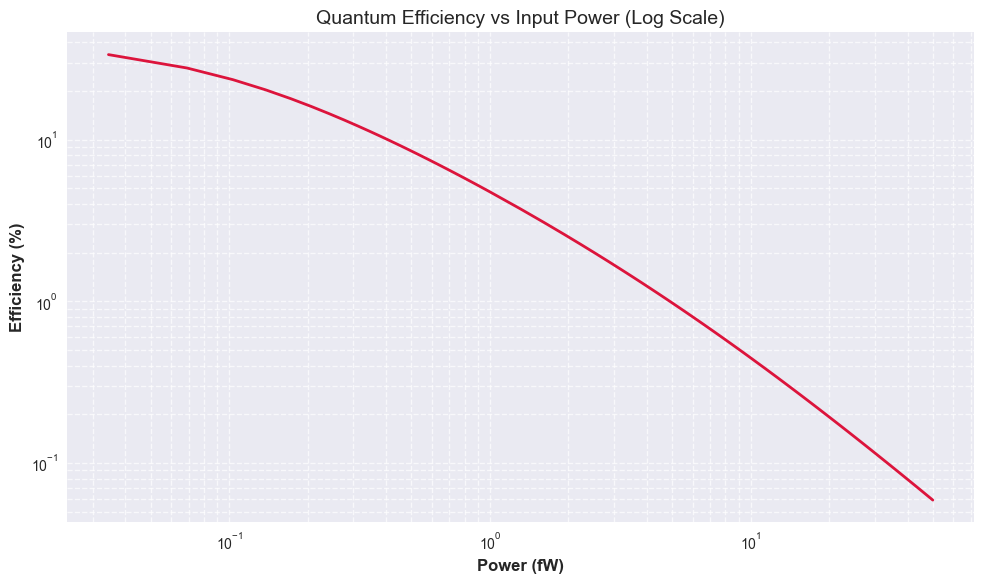

In [203]:
# Calculate photocurrent
photocurrent = photocurrent_nonlinear(power, fdrive, fr,fr, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax, dot_dephasing)

# Styling adjustments
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 14, 'axes.labelsize': 12})

# Plot 1: Photocurrent vs Power
plt.figure(figsize=(10, 6))
plt.plot(power * 1e15, photocurrent, color='royalblue', linewidth=2)
plt.xlabel('Power (fW)', fontweight='bold')  # Corrected unit to femtowatts (fW)
plt.ylabel('Photocurrent (A)', fontweight='bold')
plt.title('Photocurrent vs Input Power')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Efficiency (log-log scale)
plt.figure(figsize=(10, 6))
efficiency = [100*photocurrent[i] / (1.602e-19 * power[i] / (const.h * fr * 1e9))  # Added 100* for percentage
              for i in range(len(photocurrent))]

plt.plot(power * 1e15, efficiency, color='crimson', linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Power (fW)', fontweight='bold')
plt.ylabel('Efficiency (%)', fontweight='bold')  # Corrected label
plt.title('Quantum Efficiency vs Input Power (Log Scale)')
plt.grid(True, linestyle='--', alpha=0.7, which='both')
plt.tight_layout()
plt.show()

Interdot tunneling rate modeling

/var/folders/0x/61cppml13m3_585zg8q3279w0000gn/T/ipykernel_37213/2871433782.py:38: RuntimeWarning: invalid value encountered in scalar divide
  Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

Text(0, 0.5, 'Efficiency (%)')

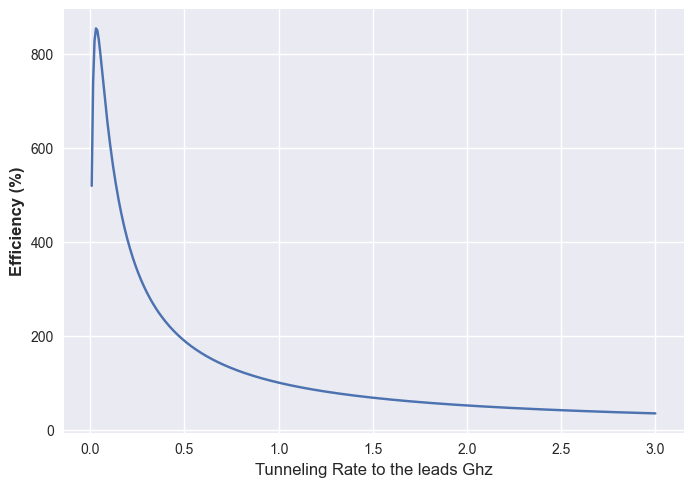

In [204]:
tunneling_rate = np.linspace(0,3, 400)
power = np.linspace(0.00001e-15, 1e-15, 100)
n_dot = power / (const.h * fr * 1e9)
max_efficiency = []
for j in range(len(tunneling_rate)):
    photocurrent = photocurrent_nonlinear(power, fdrive, fr,fr, kappa, kappa_c, 
                                      self_Kerr, cross_Kerr, gamma_phi_kerr, 
                                      tunneling_rate[j], tunneling_rate[j], g0, tc, gamma_relax, dot_dephasing)
# Calculate efficiency (ensure const.hbar and fr are correctly defined)
    efficiency = [100 * photocurrent[i] / (1.602e-19*power[i] / (const.h * fr * 1e9))  # Added 100* for percentage
                  for i in range(len(photocurrent))]
    max_efficiency.append(np.max(efficiency))
plt.plot(tunneling_rate, max_efficiency)
plt.xlabel('Tunneling Rate to the leads Ghz')
plt.ylabel('Efficiency (%)', fontweight='bold')

In [816]:
fr

3.65

Characteristic of DQD

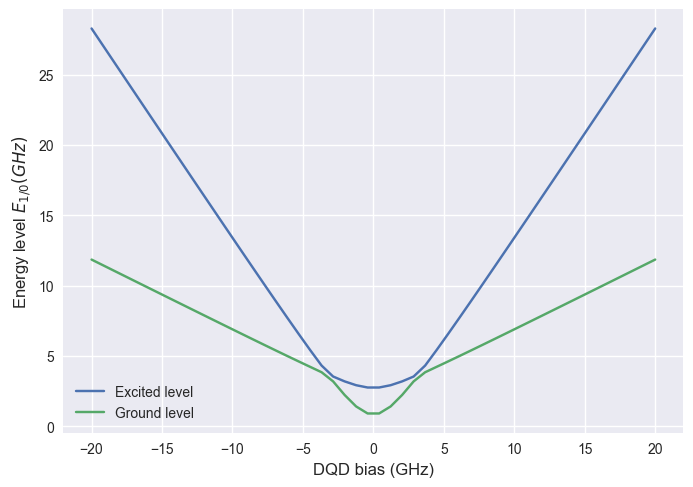

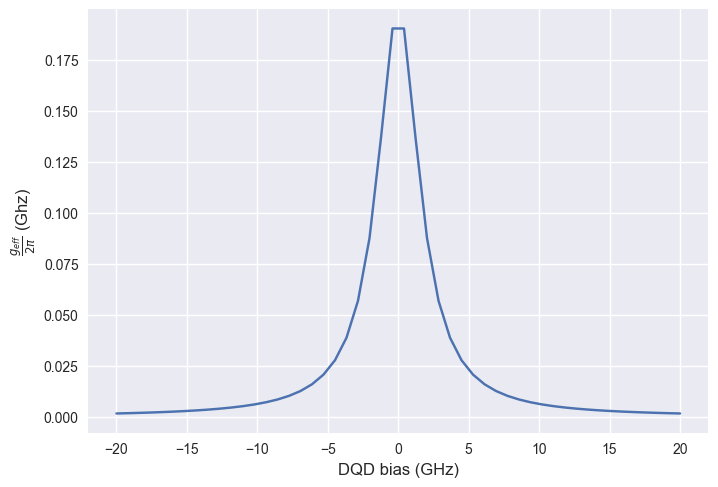

In [11]:
fdrive_dispersive = 10
def energydiagram(epsilon, fdrive, g0, tc):
    #epsilon = (frequency**2-4*tc)**0.5
    frequency = np.sqrt(epsilon**2+4*tc**2)
    cos_theta_2 = (1-epsilon/frequency)/2 #cos(theta/2)^2
    sin_theta_2 = 1-cos_theta_2
    g = g0*np.sqrt(1-(epsilon/frequency)**2)
    E_up = (frequency)+np.sqrt(4*g**2+(fdrive-frequency)**2)/2
    E_down = (frequency)-np.sqrt(4*g**2+(fdrive-frequency)**2)/2
    return E_up, E_down

def g(epsilon, g0, tc):
    frequency = np.sqrt(epsilon**2+4*tc**2)
    cos_theta = -epsilon/(frequency)
    g = g0*(1-cos_theta**2)
    return g

DQD_bias = np.linspace(-20,20, 50)
tc =0.9
g0 = 0.2
fdrive_dispersive = 3.65
plt.plot(DQD_bias, energydiagram(DQD_bias,fdrive_dispersive,g0, tc)[0], label = 'Excited level')
plt.xlabel('DQD bias (GHz)')
plt.ylabel(r'Energy level $E_{1/0} (GHz)$')
plt.plot(DQD_bias, energydiagram(DQD_bias,fdrive_dispersive,g0, tc)[1], label = 'Ground level')
plt.legend()
plt.show()
plt.plot(DQD_bias,g(DQD_bias, g0, tc))
plt.xlabel('DQD bias (GHz)')
plt.ylabel(r'$\frac{g_{eff}}{2\pi}$ (Ghz)')
plt.show()

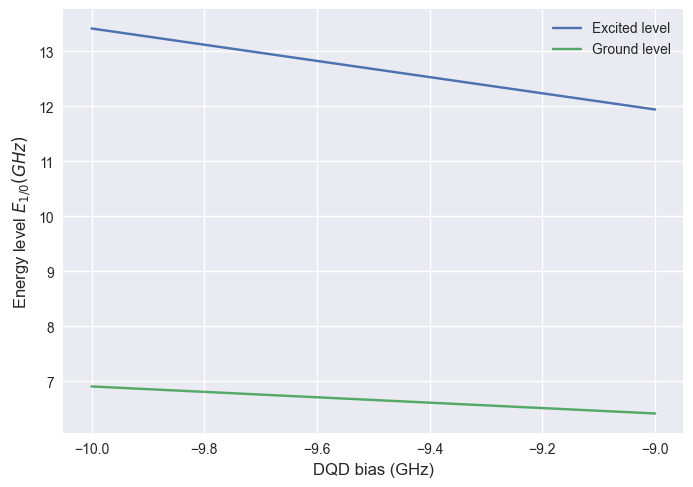

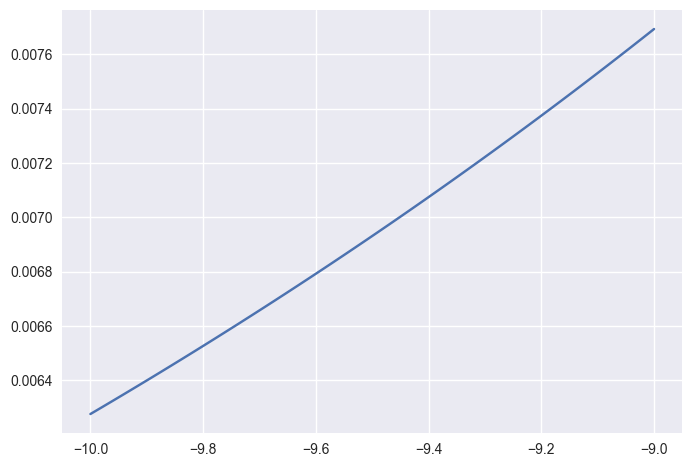

In [12]:
def energydiagram(epsilon, fdrive, g0, tc):
    #epsilon = (frequency**2-4*tc)**0.5
    frequency = np.sqrt(epsilon**2+4*tc**2)
    cos_theta_2 = (1-epsilon/frequency)/2 #cos(theta/2)^2
    sin_theta_2 = 1-cos_theta_2
    g = g0*np.sqrt(1-(cos_theta_2-sin_theta_2)**2)
    E_up = (frequency)+np.sqrt(4*g**2+(fdrive-frequency)**2)/2
    E_down = (frequency)-np.sqrt(4*g**2+(fdrive-frequency)**2)/2
    return E_up, E_down
def g(epsilon, g0, tc):
    frequency = np.sqrt(epsilon**2+4*tc**2)
    cos_theta = -epsilon/(frequency)
    g = g0*(1-cos_theta**2)
    return g
DQD_bias = np.linspace(-10,-9, 50)
plt.plot(DQD_bias, energydiagram(DQD_bias,fdrive_dispersive,g0, tc)[0], label = 'Excited level')
plt.xlabel('DQD bias (GHz)')
plt.ylabel(r'Energy level $E_{1/0} (GHz)$')
plt.plot(DQD_bias, energydiagram(DQD_bias,fdrive_dispersive,g0, tc)[1], label = 'Ground level')
plt.legend()
plt.show()
plt.plot(DQD_bias,g(DQD_bias, g0, tc))
plt.show()

[0.01006618 0.0101418  0.01021825 0.01029555 0.01037371 0.01045274
 0.01053266 0.01061347 0.01069519 0.01077783 0.01086141 0.01094594
 0.01103143 0.0111179  0.01120536 0.01129383 0.01138333 0.01147386
 0.01156544 0.0116581  0.01175184 0.01184668 0.01194264 0.01203974
 0.01213799 0.01223742 0.01233803 0.01243985 0.01254289 0.01264718
 0.01275274 0.01285958 0.01296773 0.0130772  0.01318802 0.01330021
 0.01341378 0.01352877 0.01364519 0.01376307 0.01388244 0.0140033
 0.0141257  0.01424965 0.01437518 0.01450232 0.01463109 0.01476151
 0.01489363 0.01502746 0.01516303 0.01530037 0.01543951 0.01558049
 0.01572333 0.01586806 0.01601472 0.01616334 0.01631395 0.01646659
 0.01662129 0.01677808 0.01693701 0.01709811 0.01726142 0.01742697
 0.01759481 0.01776497 0.0179375  0.01811244 0.01828982 0.01846971
 0.01865213 0.01883713 0.01902476 0.01921508 0.01940811 0.01960392
 0.01980256 0.02000407 0.02020851 0.02041593 0.02062639 0.02083994
 0.02105664 0.02127655 0.02149972 0.02172623 0.02195612 0.02218

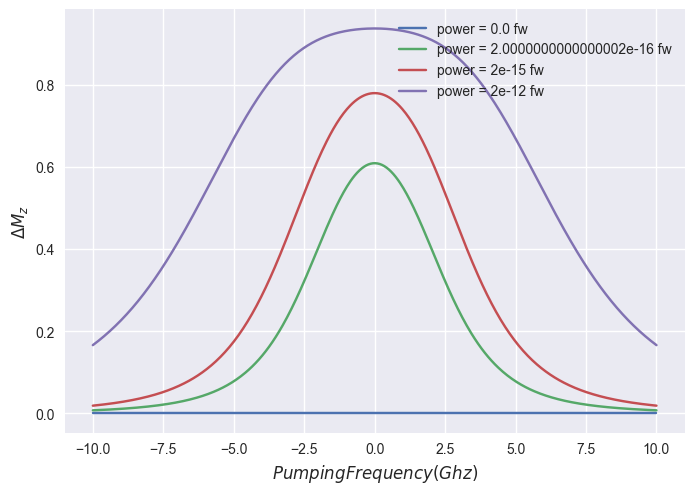

In [1023]:
def get_photonnumber_int(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi, freq_unit='GHz'):
    f_scale = 10**9
    roots = []

    alpha_in = np.sqrt(power/(const.h*fr)) / f_scale
    denom = kappa + gamma_phi
    delta_c_corr = (-fr + fdrive) / denom
    alpha_in_tilde = np.sqrt(kappa_c) * alpha_in / denom
    ksi = self_Kerr * abs(alpha_in_tilde)**2 / denom
    gamma_phi_tilde = gamma_phi * abs(alpha_in_tilde)**2 / denom

    p = [0]*4
    p[0] = -1
    p[1] = 1/4 + delta_c_corr**2
    p[2] = -2*ksi*delta_c_corr 
    p[3] = ksi**2
    poly = np.polynomial.Polynomial(p)
    return max(poly.roots().real) * abs(alpha_in_tilde)**2

def mz(power, fdrive, fr,dqd_bias, kappa, kappa_c, self_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax):
    delta_c = fr - fdrive
    fqubit = np.sqrt(dqd_bias**2+4*tc**2)
    epsilon = (fqubit**2-4*tc)**0.5
    cos_theta_2 = (1-epsilon/fqubit)/2 #cos(theta/2)^2
    sin_theta_2 = 1-cos_theta_2
    Gamma_0e = Gamma_L*cos_theta_2 + Gamma_R*sin_theta_2
    Gamma_g0 = Gamma_L*sin_theta_2 + Gamma_R*cos_theta_2
    Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)
    Gamma_2 = (gamma_relax + Gamma_0e) / 2
    nc = get_photonnumber_int(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
    cos_theta = -epsilon/(fqubit)
    g_eff = g0*np.sqrt(1-cos_theta**2)
    print(g_eff)
    #g_eff = g0 * 2*tc/fr*(np.sqrt((fr+nc*2*self_Kerr)/fr))
    m0 = -(Gamma_0e)*Gamma_g0/((gamma_relax+Gamma_0e)*Gamma_g0+Gamma_0e*(gamma_relax)/2)
    G = 4*g_eff**2*Gamma_2/ (Gamma_1 * ((delta_c)**2 + (Gamma_2)**2))
    m_z = m0/(1 + G*nc)
    return m_z, m0
power = np.linspace(0, 0.2, 2)*10**-15
power1 = np.linspace(2, 2000, 2)*10**-15
power = np.hstack((power, power1))
DQD_bias = np.linspace(-10,10, 500)
mz_list = []
m0_list = []
for i in range(len(power)):
    mz_array, m0_array = mz(power[i], fdrive, fr,DQD_bias, kappa, kappa_c, self_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax)
    mz_list.append(mz_array)
    m0_list.append(m0_array)
#plt.plot(DQD_bias, mz_list[1])
for i in range(len(power)):
    #plt.plot(DQD_bias, mz_list[i])
    plt.plot(DQD_bias, mz_list[i]-m0_list[i], label = f'power = {power[i]} fw')
plt.ylabel(r'$\Delta M_{z}$')
plt.xlabel(r'$Pumping Frequency (Ghz)$')
plt.legend()
plt.show()

In [194]:
import numpy as np
def chi_rho(w, wa, gamma_2):
    return 1/(wa-w-1j*(gamma_2))

def chi_ab(epsilon,w,wr, tc, kc, kappa, g0, qubits_dephasing, qubits_relaxation, Gamma_R, Gamma_L):
    wa = np.sqrt(epsilon**2+tc**2*4)
    delta_rb = wr-w
    costheta = -epsilon/wa
    sintheta = (1-costheta**2)**0.5
    cos_theta_2 = (1-epsilon/wa)/2 #cos(theta/2)^2
    sin_theta_2 = 1-cos_theta_2
    Gamma_0e = Gamma_L*cos_theta_2 + Gamma_R*sin_theta_2
    Gamma_g0 = Gamma_L*sin_theta_2 + Gamma_R*cos_theta_2

    g = g0*sintheta
    gamma_2 = (qubits_relaxation + 2*qubits_dephasing + Gamma_0e)/2
    chirho = chi_rho(w, wa, gamma_2)
    chiab = np.sqrt(kc)/(delta_rb-g**2*(chirho)-1j*kappa/2)
    return chiab

def photo_currents(n_dot, epsilon,w,wr, tc, kc, kappa, g0, qubits_dephasing, qubits_relaxation, Gamma_R, Gamma_L):
    wa = np.sqrt(epsilon**2+tc**2*4)
    costheta = -epsilon/wa
    sintheta = (1-costheta**2)**0.5
    cos_theta_2 = (1+costheta)/2 #cos(theta/2)^2
    sin_theta_2 = 1-cos_theta_2
    Gamma_0e = Gamma_L*cos_theta_2 + Gamma_R*sin_theta_2
    Gamma_g0 = Gamma_L*sin_theta_2 + Gamma_R*cos_theta_2
    gamma_1 = qubits_relaxation + (2*Gamma_0e*Gamma_g0-qubits_relaxation*Gamma_0e)/(Gamma_0e + 2*Gamma_g0)

    gamma_2 = (qubits_relaxation + 2*qubits_dephasing+Gamma_0e)/2
    g = g0*sintheta
    chiab = chi_ab(epsilon,w,wr, tc, kc, kappa, g0, qubits_dephasing, qubits_relaxation, Gamma_R, Gamma_L)
    chirho = chi_rho(w, wa, gamma_2)
    nc = photon_number(n_dot, chiab)
    G = (4*g**2/(gamma_1)*chirho.imag)
    mz = -1/(1+G*nc)
    photocurrent = -1.602*10**-19*10**9*Gamma_R*(1+mz)/(Gamma_0e+2*Gamma_g0)*(Gamma_0e*cos_theta_2-Gamma_g0*sin_theta_2)*2*np.pi
    return photocurrent


def photon_number(n_dot, chiab):
    return n_dot*abs(chiab)**2



In [195]:
#all units in Ghz
kc = 0.008
w0 = 8
wr = 8
g0 = 0.2
gamma_r = 0.030
gamma_l = 0.030
tc = 1
qubits_relaxation = 0.025

## Fig 2

In [196]:
import matplotlib.pyplot as plt

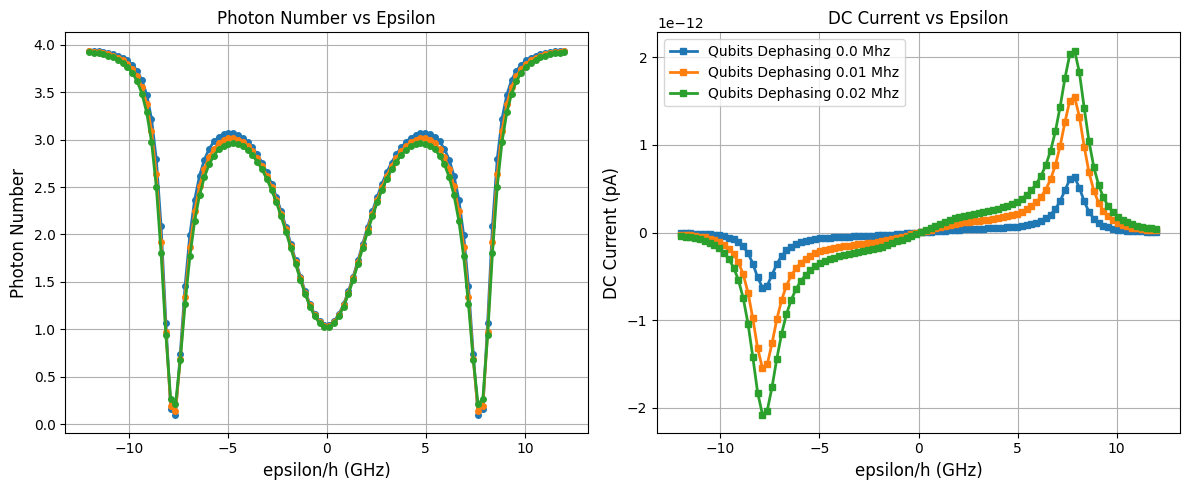

In [206]:
qubits_dephasing = [0,0.01*2*np.pi, 0.02*2*np.pi]
n_dot = (50*10**6)**2/kc/10**18/(2*np.pi)**2
epsilon = np.linspace(-12,12,100)
wa = np.sqrt(epsilon**2+tc**2*4)
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for dephasing in qubits_dephasing:
    chiab = chi_ab(epsilon,wr,wr, tc, kc, kc, g0, dephasing, qubits_relaxation, gamma_r, gamma_l)
    nc = photon_number(n_dot, chiab)
    current = photo_currents(n_dot, epsilon,wr,wr, tc, kc, kc, g0, dephasing, qubits_relaxation, gamma_r, gamma_l)
    # First plot: Photon number vs epsilon
    axs[0].plot(epsilon, nc, linewidth=2, marker='o', markersize=4)
    axs[0].set_xlabel("epsilon/h (GHz)", fontsize=12)
    axs[0].set_ylabel("Photon Number", fontsize=12)
    axs[0].set_title("Photon Number vs Epsilon")
    axs[0].grid(True)

    # Second plot: DC current vs epsilon
    axs[1].plot(epsilon, current, linewidth=2, marker='s', markersize=4, label = f'Qubits Dephasing {dephasing/(np.pi*2)} Mhz')
    axs[1].set_xlabel("epsilon/h (GHz)", fontsize=12)
    axs[1].set_ylabel("DC Current (pA)", fontsize=12)
    axs[1].set_title("DC Current vs Epsilon")
    axs[1].grid(True)

    # Adjust layout to prevent overlap and show the plot
    plt.tight_layout()
plt.legend()
plt.show()

## FIG. 3

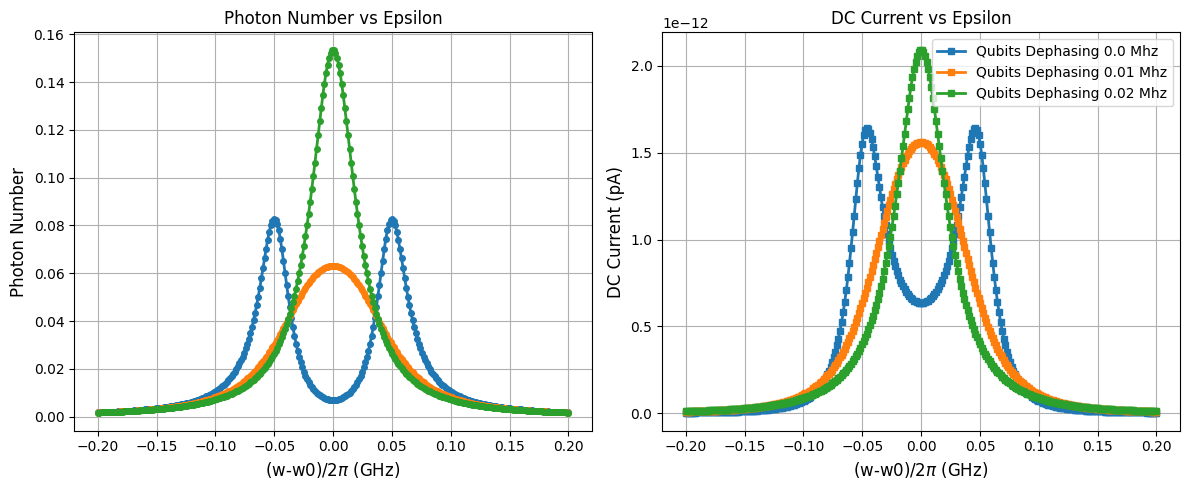

In [207]:
qubits_dephasing = [0,0.01*2*np.pi, 0.02*2*np.pi]
n_dot = (50*10**6)**2/kc/10**18/(2*np.pi)**2
w = np.linspace(7.8,8.2,300)
wa = 8.0
w0 = 8.0

epsilon = np.sqrt(wa**2-4*tc**2)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for dephasing in qubits_dephasing:
    chiab = chi_ab(epsilon,w,wr, tc, kc, kc, g0, dephasing, qubits_relaxation, gamma_r, gamma_l)
    nc = photon_number(n_dot, chiab)
    current = photo_currents(n_dot, epsilon,w,wr, tc, kc, kc, g0, dephasing, qubits_relaxation, gamma_r, gamma_l)
    # First plot: Photon number vs epsilon
    axs[0].plot(w-w0, nc, linewidth=2, marker='o', markersize=4)
    axs[0].set_xlabel(r"(w-w0)/2$\pi$ (GHz)", fontsize=12)
    axs[0].set_ylabel("Photon Number", fontsize=12)
    axs[0].set_title("Photon Number vs Epsilon")
    axs[0].grid(True)

    # Second plot: DC current vs epsilon
    axs[1].plot(w-w0, current, linewidth=2, marker='s', markersize=4, label = f'Qubits Dephasing {dephasing/(np.pi*2)} Mhz')
    axs[1].set_xlabel(r"(w-w0)/2$\pi$ (GHz)", fontsize=12)
    axs[1].set_ylabel("DC Current (pA)", fontsize=12)
    axs[1].set_title("DC Current vs Epsilon")
    axs[1].grid(True)

    # Adjust layout to prevent overlap and show the plot
    plt.tight_layout()
plt.legend()
plt.show()

## FIG. 4

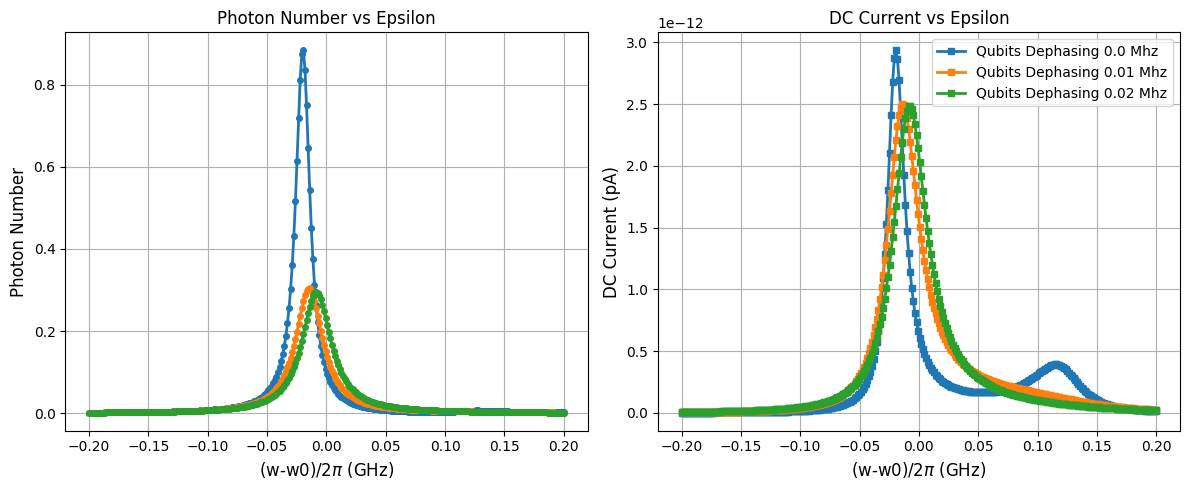

In [208]:
qubits_dephasing = [0,0.01*2*np.pi, 0.02*2*np.pi]
n_dot = (50*10**6)**2/kc/10**18/(2*np.pi)**2
w = np.linspace(7.8,8.2,300)
wa = 8.1
w0 = 8.0

epsilon = np.sqrt(wa**2-4*tc**2)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for dephasing in qubits_dephasing:
    chiab = chi_ab(epsilon,w,wr, tc, kc, kc, g0, dephasing, qubits_relaxation, gamma_r, gamma_l)
    nc = photon_number(n_dot, chiab)
    current = photo_currents(n_dot, epsilon,w,wr, tc, kc, kc, g0, dephasing, qubits_relaxation, gamma_r, gamma_l)
    # First plot: Photon number vs epsilon
    axs[0].plot(w-w0, nc, linewidth=2, marker='o', markersize=4)
    axs[0].set_xlabel(r"(w-w0)/2$\pi$ (GHz)", fontsize=12)
    axs[0].set_ylabel("Photon Number", fontsize=12)
    axs[0].set_title("Photon Number vs Epsilon")
    axs[0].grid(True)

    # Second plot: DC current vs epsilon
    axs[1].plot(w-w0, current, linewidth=2, marker='s', markersize=4, label = f'Qubits Dephasing {dephasing/(np.pi*2)} Mhz')
    axs[1].set_xlabel(r"(w-w0)/2$\pi$ (GHz)", fontsize=12)
    axs[1].set_ylabel("DC Current (pA)", fontsize=12)
    axs[1].set_title("DC Current vs Epsilon")
    axs[1].grid(True)

    # Adjust layout to prevent overlap and show the plot
    plt.tight_layout()
plt.legend()
plt.show()

## FIG. 5

In [1]:
qubits_dephasing = [0]
n_dot = (30*10**6)**2/kc/10**18
w = np.linspace(7.9,8.1,300)
wa = 8.0
w0 = 8.0
lead_relaxation = 0.0001

epsilon = np.sqrt(wa**2-4*tc**2)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for dephasing in qubits_dephasing:
    chiab = chi_ab(epsilon,w,wr, tc, kc, kc, g0, dephasing, qubits_relaxation, lead_relaxation, lead_relaxation)
    nc = photon_number(n_dot, chiab)
    current = photo_currents(n_dot, epsilon,w,wr, tc, kc, kc, g0, dephasing, qubits_relaxation, lead_relaxation, lead_relaxation)
    # First plot: Photon number vs epsilon
    axs[0].plot(w-w0, nc, linewidth=2, marker='o', markersize=4)
    axs[0].set_xlabel(r"(w-w0)/2$\pi$ (GHz)", fontsize=12)
    axs[0].set_ylabel("Photon Number", fontsize=12)
    axs[0].set_title("Photon Number vs Epsilon")
    axs[0].grid(True)

    # Second plot: DC current vs epsilon
    axs[1].plot(w-w0, current, linewidth=2, marker='s', markersize=4, label = f'Qubits Dephasing {dephasing/(np.pi*2)} Mhz')
    axs[1].set_xlabel(r"(w-w0)/2$\pi$ (GHz)", fontsize=12)
    axs[1].set_ylabel("DC Current (pA)", fontsize=12)
    axs[1].set_title("DC Current vs Epsilon")
    axs[1].grid(True)

    # Adjust layout to prevent overlap and show the plot
    plt.tight_layout()
plt.legend()
plt.show()

NameError: name 'kc' is not defined

## simulate the tunneling rate

In [390]:
from scipy import constants as const
import numpy as np
import matplotlib.pyplot as plt
import scipy
def get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi, freq_unit='GHz'):
    f_scale = 10**9
    roots = []
    for pwr in power:
        alpha_in = np.sqrt(pwr/(const.h*fr))/f_scale
        denom = kappa + gamma_phi
        delta_c_corr = (-fr + fdrive) / denom
        alpha_in_tilde = np.sqrt(kappa_c) * alpha_in / denom
        ksi = self_Kerr * abs(alpha_in_tilde)**2 / denom
        gamma_phi_tilde = gamma_phi * abs(alpha_in_tilde)**2 / denom
        p = [0]*4
        p[0] = -1
        p[1] = 1/4 + delta_c_corr**2
        p[2] = -2*ksi*delta_c_corr + gamma_phi_tilde
        p[3] = ksi**2 + gamma_phi_tilde**2
        poly = np.polynomial.Polynomial(p)
        roots.append(max(poly.roots().real) * abs(alpha_in_tilde)**2)
    return np.array(roots)

def photocurrent_nonlinear(power, fdrive, fr,fqubit, kappa, kappa_c, self_Kerr, cross_Kerr, gamma_phi_kerr, Gamma_L, Gamma_R, g0, tc, gamma_relax, dot_dephasing):
    nc = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
    f_scale = 10**9
    n_dot = power/(const.h*fr*10**18)
    delta_c = fr - fdrive
    epsilon = (fqubit**2-4*tc**2)**0.5
    cos_theta_2 = (1-epsilon/fqubit)/2 #cos(theta/2)^2
    sin_theta_2 = 1-cos_theta_2
    Gamma_0e = Gamma_L*cos_theta_2 + Gamma_R*sin_theta_2
    Gamma_g0 = Gamma_L*sin_theta_2 + Gamma_R*cos_theta_2
    Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)
    Gamma_2 = (gamma_relax + Gamma_0e) / 2
    cos_theta = -epsilon/(fqubit)
    g_eff = g0*np.sqrt(1-cos_theta**2)
    #effective_Gamma_2 = (Gamma_2+nc**2*gamma_phi_kerr)*np.sqrt(1+n_dot/Gamma_2/Gamma_1)
    effective_Gamma_2 = (Gamma_2)
    G = 4*g_eff**2*(effective_Gamma_2)/ (Gamma_1 * ((delta_c)**2 + (effective_Gamma_2)**2))
    #G = 4*g_eff**2*Gamma_2/ (Gamma_1 * ((delta_c)**2 + (Gamma_2)**2))*np.sqrt(nc)
    m_z = -1/(1 + G*nc)
    return const.e * Gamma_R * (1+m_z)/(2*np.pi) / (Gamma_0e+2*Gamma_g0) * (Gamma_0e * cos_theta_2 - Gamma_g0 * sin_theta_2) * f_scale*-1
def tunneling_rate(coupling_dqd_resonator, tc, nc, k_photon_process=3):
    bessel_order = np.reshape(np.arange(0,k_photon_process, 1), [k_photon_process,1])
    para = 2*np.sqrt(coupling_dqd_resonator*nc)
    Jk = scipy.special.jv(bessel_order, para)
    Jk_2 = Jk**2
    sum_Jk_2 = np.sum(Jk_2, axis = 0)
    return sum_Jk_2*2*tc**2

In [391]:
power = np.linspace(0, 1e-15, 30)
power_higher = np.linspace(1e-15, 10e-15, 30)
power_higherer = np.linspace(10e-15,3000e-15, 30)
power = np.hstack((power, power_higher, power_higherer))
fdrive = 3.65
fr = fdrive
kappa = 0.02866
kappa_c = 0.0236
self_Kerr = -0.00135
cross_Kerr = 0
gamma_phi_kerr = 0.000
Gamma_L = 2.5
Gamma_R = 2.5
gamma_relax = 0.100
dot_dephasing = 0.02
g0 = 0.20
tc = 1.05

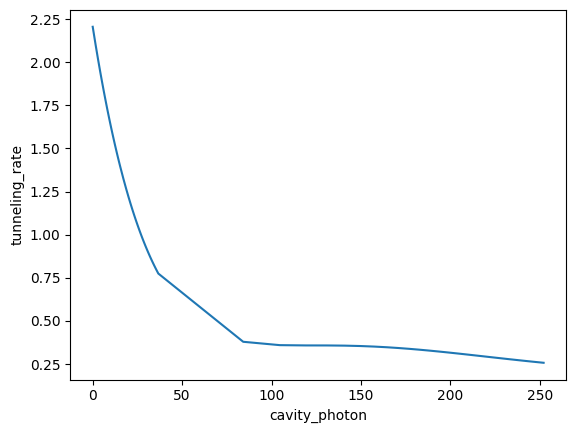

Text(0.5, 0, 'cavity')

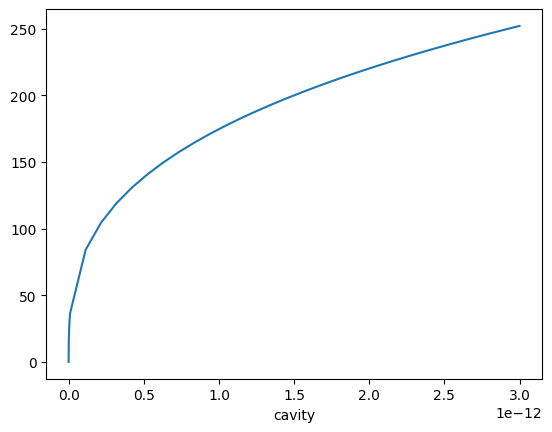

In [394]:
def tunneling_rate(nc, coupling_dqd_resonator, tc, k_photon_process=4):
    bessel_order = np.reshape(np.arange(0,k_photon_process, 1), [k_photon_process,1])
    para = 2*np.sqrt(coupling_dqd_resonator*nc)
    Jk = scipy.special.jv(bessel_order, para)
    Jk_2 = Jk**2
    sum_Jk_2 = np.sum(Jk_2, axis = 0)
    return sum_Jk_2*2*tc**2
nc = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
tunnelingrate = tunneling_rate(nc, 0.03, tc, 2)
plt.plot(nc, tunnelingrate)
plt.xlabel('cavity_photon')
plt.ylabel('tunneling_rate')
plt.show()
plt.plot(power, nc)
plt.xlabel('cavity')

## test photo current when only consider the tunneling photon loss

In [93]:
from scipy import constants as const
import numpy as np
import matplotlib.pyplot as plt
import scipy
def get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi, freq_unit='GHz'):
    f_scale = 10**9
    roots = []
    for pwr in power:
        alpha_in = np.sqrt(pwr/(const.h*fr))/f_scale
        denom = kappa + gamma_phi
        delta_c_corr = (-fr + fdrive) / denom
        alpha_in_tilde = np.sqrt(kappa_c) * alpha_in / denom
        ksi = self_Kerr * abs(alpha_in_tilde)**2 / denom
        gamma_phi_tilde = gamma_phi * abs(alpha_in_tilde)**2 / denom
        p = [0]*4
        p[0] = -1
        p[1] = 1/4 + delta_c_corr**2
        p[2] = -2*ksi*delta_c_corr + gamma_phi_tilde
        p[3] = ksi**2 + gamma_phi_tilde**2
        poly = np.polynomial.Polynomial(p)
        roots.append(max(poly.roots().real) * abs(alpha_in_tilde)**2)
    return np.array(roots)

def photocurrent_nonlinear(power, fdrive, fr,fqubit, kappa, kappa_c, self_Kerr,impedance, gamma_phi_kerr, g0, tc, gamma_relax, dot_dephasing):
    nc = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
    f_scale = 10**9
    delta_c = fr - fdrive
    epsilon = (fqubit**2-4*tc**2)**0.5
    cos_theta_2 = (1-epsilon/fqubit)/2 #cos(theta/2)^2
    sin_theta_2 = 1-cos_theta_2
    Gamma_L = tunneling_rate((kappa-kappa_c), impedance, tc, nc, 3)
    Gamma_R = Gamma_L
    Gamma_R = 2.5
    Gamma_L = Gamma_R
    Gamma_0e = Gamma_L*cos_theta_2 + Gamma_R*sin_theta_2
    Gamma_g0 = Gamma_L*sin_theta_2 + Gamma_R*cos_theta_2
    Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)
    Gamma_2 = (gamma_relax + Gamma_0e) / 2 + dot_dephasing
    cos_theta = -epsilon/(fqubit)
    g_eff = g0*np.sqrt(1-cos_theta**2)
    #effective_Gamma_2 = (Gamma_2+nc**2*gamma_phi_kerr)*np.sqrt(1+n_dot/Gamma_2/Gamma_1)
    effective_Gamma_2 = (Gamma_2)
    G = 4*g_eff**2*(effective_Gamma_2)/ (Gamma_1 * ((delta_c)**2 + (effective_Gamma_2)**2))
    #G = 4*g_eff**2*Gamma_2/ (Gamma_1 * ((delta_c)**2 + (Gamma_2)**2))*np.sqrt(nc)
    m_z = -1/(1 + G*nc)
    return const.e * Gamma_R * (1+m_z)/(2*np.pi) / (Gamma_0e+2*Gamma_g0) * (Gamma_0e * cos_theta_2 - Gamma_g0 * sin_theta_2) * f_scale*-1
def tunneling_rate(coupling_dqd_resonator,resonator_impedance, tc, nc, k_photon_process=3):
    rho = coupling_dqd_resonator**2 * np.pi*resonator_impedance/(const.h*const.e**2)
    bessel_order = np.reshape(np.arange(0,k_photon_process, 1), [k_photon_process,1])
    para = 2*np.sqrt(rho*nc)
    Jk = scipy.special.jv(bessel_order, para)
    Jk_2 = Jk**2
    sum_Jk_2 = np.sum(Jk_2, axis = 0)
    return sum_Jk_2*2*tc**2

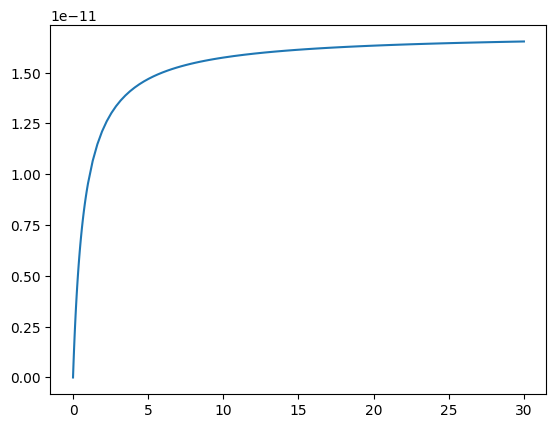

In [95]:
power = np.linspace(0, 1e-15, 30)
power_higher = np.linspace(1e-15, 10e-15, 30)
power_higherer = np.linspace(10e-15,30e-15, 30)
power = np.hstack((power, power_higher, power_higherer))
fdrive = 3.65
fr = fdrive
kappa = 0.02866
kappa_c = 0.0236
self_Kerr = -0.000
cross_Kerr = 0
gamma_phi_kerr = 0.000
gamma_relax = 0.03
dot_dephasing = 0.003 # dot dephasing = (gamma_relax + dot_dephaisng) /2
g0 = 0.20
impedance = 1400
tc = 1.1
photo_current = photocurrent_nonlinear(power, fdrive, fr,fr, kappa, kappa_c, self_Kerr,impedance, gamma_phi_kerr, g0, tc, gamma_relax, dot_dephasing)
plt.plot(power*10**15, photo_current)

epsilon, 3.053276928154405


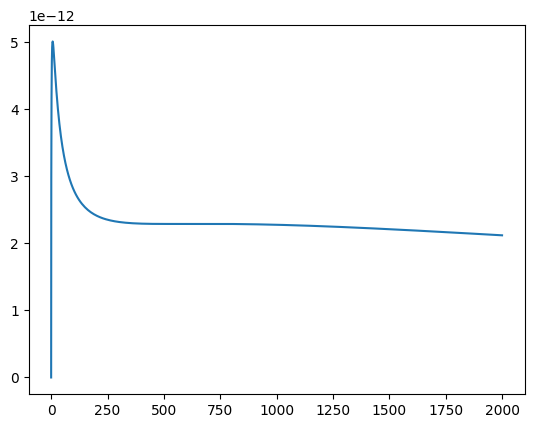

In [242]:
def tunneling_rate(coupling_dqd_resonator,resonator_impedance, tc, nc, k_photon_process=3):
    rho = coupling_dqd_resonator**2 * np.pi*resonator_impedance/(const.h/const.e**2)
    bessel_order = np.reshape(np.arange(0,k_photon_process, 1), [k_photon_process,1])
    para = 2*np.sqrt(rho*nc)
    Jk = scipy.special.jv(bessel_order, para)
    Jk_2 = Jk**2
    sum_Jk_2 = np.sum(Jk_2, axis = 0)
    return sum_Jk_2*2*tc**2

def photocurrent_nonlinear(power, fdrive, fr,fqubit, kappa, kappa_c, self_Kerr, gamma_phi_kerr, g0, tc,impedance, gamma_relax, dot_dephasing, resonator_DQD_coupling_rate):
    nc = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
    f_scale = 10**9
    delta_c = fr - fdrive
    epsilon = (fqubit**2-4*tc**2)**0.5
    cos_theta_2 = (1-epsilon/fqubit)/2 #cos(theta/2)^2
    sin_theta_2 = 1-cos_theta_2
    
    Gamma_L = tunneling_rate(resonator_DQD_coupling_rate, impedance, tc, nc, 2)
    Gamma_R = Gamma_L
    Gamma_0e = Gamma_L*cos_theta_2 + Gamma_R*sin_theta_2
    Gamma_g0 = Gamma_L*sin_theta_2 + Gamma_R*cos_theta_2
    Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)
    Gamma_2 = (gamma_relax + Gamma_0e) / 2 + dot_dephasing # total decoherance rate
    cos_theta = -epsilon/(fqubit)
    g_eff = g0*np.sqrt(1-cos_theta**2)
    #effective_Gamma_2 = (Gamma_2+nc**2*gamma_phi_kerr)*np.sqrt(1+n_dot/Gamma_2/Gamma_1)
    effective_Gamma_2 = (Gamma_2)
    G = 4*g_eff**2*(effective_Gamma_2)/ (Gamma_1 * ((delta_c)**2 + (effective_Gamma_2)**2))
    #G = 4*g_eff**2*Gamma_2/ (Gamma_1 * ((delta_c)**2 + (Gamma_2)**2))*np.sqrt(nc)
    m_z = -1/(1 + G*nc)
    return const.e * Gamma_R * (1+m_z)/(2*np.pi) / (Gamma_0e+2*Gamma_g0) * (Gamma_0e * cos_theta_2 - Gamma_g0 * sin_theta_2) * f_scale*-1
power = np.linspace(0, 1e-15, 300)
power_higher = np.linspace(1e-15, 10e-15, 300)
power_higherer = np.linspace(10e-15,2000e-15, 300)
power = np.hstack((power, power_higher, power_higherer))
fdrive = 3.65
fr = fdrive
kappa = 0.02866
kappa_c = 0.0236
self_Kerr = -0.00135
gamma_phi_kerr = 0.0025
gamma_relax = 0.003
print('epsilon,', epsilon)
dot_dephasing = 0.00 # dot dephasing = (gamma_relax + dot_dephaisng) /2
g0 = 0.20
tc = 1
impedance = 1400
resonator_dqd_coup = 0.5
photo_current = photocurrent_nonlinear(power, fdrive, fr,fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, g0, tc,impedance, gamma_relax, dot_dephasing, resonator_dqd_coup)
plt.plot(power*10**15, photo_current)

## consider backaction

In [413]:
def tunneling_rate(coupling_dqd_resonator,resonator_impedance, tc, nc, k_photon_process=3):
    rho = coupling_dqd_resonator**2 * np.pi*resonator_impedance/(const.h/const.e**2)
    bessel_order = np.reshape(np.arange(0,k_photon_process, 1), [k_photon_process,1])
    para = 2*np.sqrt(rho*nc)
    Jk = scipy.special.jv(bessel_order, para)
    Jk_2 = Jk**2
    sum_Jk_2 = np.sum(Jk_2, axis = 0)
    return sum_Jk_2*2*tc**2

def photocurrent_nonlinear(power, fdrive, fr,fqubit, kappa, kappa_c, self_Kerr, gamma_phi_kerr, g0, tc,impedance, gamma_relax, dot_dephasing, resonator_DQD_coupling_rate):
    nc = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
    f_scale = 10**9
    delta_c = fr - fdrive
    epsilon = (fqubit**2-4*tc**2)**0.5
    cos_theta_2 = (1-epsilon/fqubit)/2 #cos(theta/2)^2
    sin_theta_2 = 1-cos_theta_2
    n_dot = power/(const.h*fr*10**18)
    Gamma_L = tunneling_rate(resonator_DQD_coupling_rate, impedance, tc, nc, 2)
    Gamma_R = Gamma_L
    Gamma_0e = Gamma_L*cos_theta_2 + Gamma_R*sin_theta_2
    Gamma_g0 = Gamma_L*sin_theta_2 + Gamma_R*cos_theta_2
    Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)
    Gamma_2 = (gamma_relax + Gamma_0e) / 2 + dot_dephasing # total decoherance rate
    cos_theta = -epsilon/(fqubit)
    g_eff = g0*np.sqrt(1-cos_theta**2)
    #effective_Gamma_2 = (Gamma_2+nc**2*gamma_phi_kerr)*np.sqrt(1+n_dot/Gamma_2/Gamma_1)
    #effective_Gamma_2 = (Gamma_2)*np.sqrt(1+n_dot/Gamma_2/Gamma_1)
    effective_Gamma_2 = (Gamma_2)
    G = 4*g_eff**2*(effective_Gamma_2)/ (Gamma_1 * ((delta_c)**2 + (effective_Gamma_2)**2))
    #G = 4*g_eff**2*Gamma_2/ (Gamma_1 * ((delta_c)**2 + (Gamma_2)**2))*np.sqrt(nc)
    m_z = -1/(1 + G*nc)
    return const.e * Gamma_R * (1+m_z)/(2*np.pi) / (Gamma_0e+2*Gamma_g0) * (Gamma_0e * cos_theta_2 - Gamma_g0 * sin_theta_2) * f_scale*-1
power = np.linspace(0, 0.1e-15, 30)
power_higher = np.linspace(0.1e-15, 1e-15, 30)
power_higherer = np.linspace(1e-15,50e-15, 300)
power = np.hstack((power, power_higher, power_higherer))
fdrive = 3.65
fr = fdrive
kappa = 0.02866
kappa_c = 0.0236
self_Kerr = -0.00135
gamma_phi_kerr = 0.00025
gamma_relax = 0.03
print('epsilon,', epsilon)
dot_dephasing = 0.003 # dot dephasing = (gamma_relax + dot_dephaisng) /2
g0 = [0.2*np.sqrt(0.01), 0.2*np.sqrt(0.1), 0.20]
tc = 1
impedance = [10, 100, 1000]
resonator_dqd_coup = 0.5
photo_current_list = []
efficiency_list = []
for i in range(len(impedance)):
    photo_current = photocurrent_nonlinear(power, fdrive, fr,fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, g0[i], tc,impedance[i], gamma_relax, dot_dephasing, resonator_dqd_coup)
    efficiency = [100 * photo_current[i] / (1.602e-19*power[i] / (const.h * fr * 1e9)) for i in range(len(photo_current))]
    photo_current_list.append(photo_current)
    efficiency_list.append(efficiency)

epsilon, 3.053276928154405


/var/folders/0x/61cppml13m3_585zg8q3279w0000gn/T/ipykernel_74955/2174930339.py:54: RuntimeWarning: invalid value encountered in scalar divide
  efficiency = [100 * photo_current[i] / (1.602e-19*power[i] / (const.h * fr * 1e9)) for i in range(len(photo_current))]


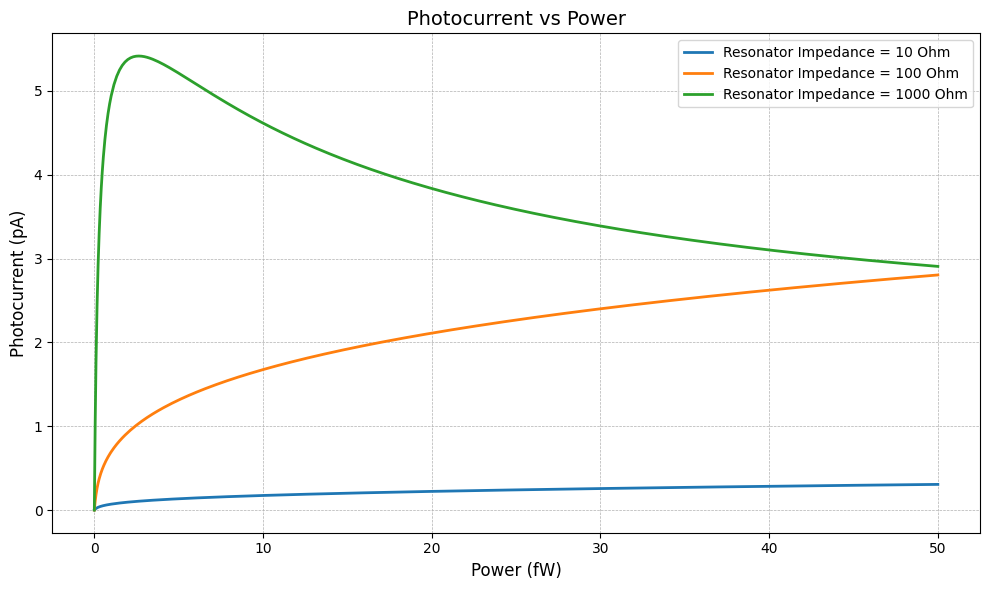

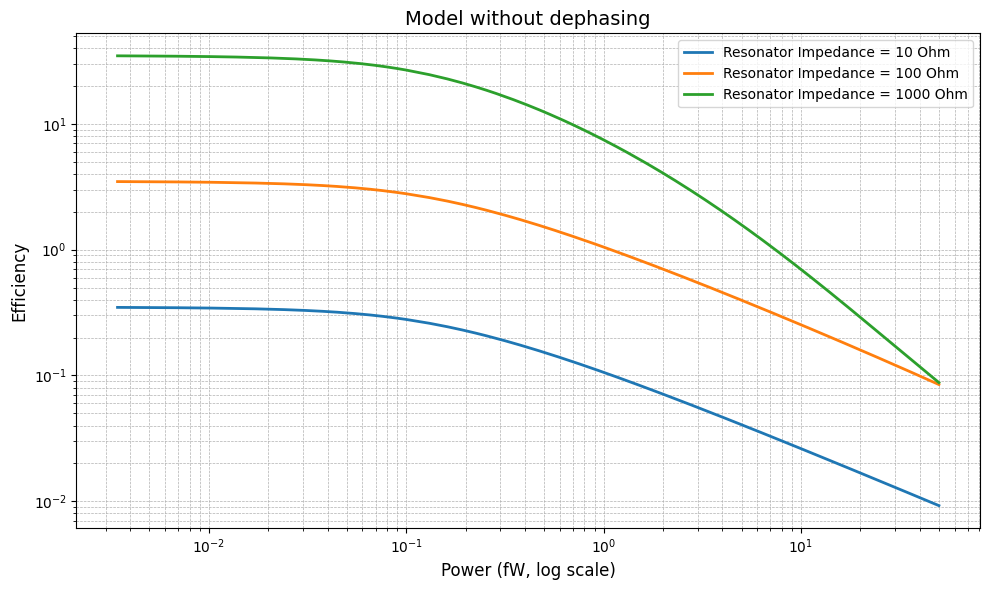

In [414]:
plt.figure(figsize=(10, 6))
for i in range(len(impedance)):
    plt.plot(power * 1e15, photo_current_list[i]*10**12, linewidth=2, label = f'Resonator Impedance = {impedance[i]} Ohm')
plt.xlabel('Power (fW)', fontsize=12)
plt.ylabel('Photocurrent (pA)', fontsize=12)
plt.title('Photocurrent vs Power', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i in range(len(impedance)):
    plt.plot(power * 1e15, efficiency_list[i], linewidth=2, label = f'Resonator Impedance = {impedance[i]} Ohm')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Power (fW, log scale)', fontsize=12)
plt.ylabel('Efficiency', fontsize=12)
plt.title('Model without dephasing', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()


## model with backaction

In [417]:
def tunneling_rate(coupling_dqd_resonator,resonator_impedance, tc, nc, k_photon_process=3):
    rho = coupling_dqd_resonator**2 * np.pi*resonator_impedance/(const.h/const.e**2)
    bessel_order = np.reshape(np.arange(0,k_photon_process, 1), [k_photon_process,1])
    para = 2*np.sqrt(rho*nc)
    Jk = scipy.special.jv(bessel_order, para)
    Jk_2 = Jk**2
    sum_Jk_2 = np.sum(Jk_2, axis = 0)
    return sum_Jk_2*2*tc**2

def photocurrent_model_2(power, fdrive, fr,fqubit, kappa, kappa_c, self_Kerr, gamma_phi_kerr, g0, tc,impedance, gamma_relax, dot_dephasing, resonator_DQD_coupling_rate):
    nc = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
    f_scale = 10**9
    delta_c = fr - fdrive
    epsilon = (fqubit**2-4*tc**2)**0.5
    cos_theta_2 = (1-epsilon/fqubit)/2 #cos(theta/2)^2
    sin_theta_2 = 1-cos_theta_2
    n_dot = power/(const.h*fr*10**18)
    Gamma_L = tunneling_rate(resonator_DQD_coupling_rate, impedance, tc, nc, 2)
    Gamma_R = Gamma_L
    Gamma_0e = Gamma_L*cos_theta_2 + Gamma_R*sin_theta_2
    print(Gamma_0e)
    Gamma_g0 = Gamma_L*sin_theta_2 + Gamma_R*cos_theta_2
    print(g0)
    Gamma_1 = gamma_relax + (2*Gamma_0e*Gamma_g0 - gamma_relax*Gamma_0e) / (Gamma_0e + 2*Gamma_g0)
    Gamma_2 = (gamma_relax + Gamma_0e) / 2 + dot_dephasing # total decoherance rate
    cos_theta = -epsilon/(fqubit)
    g_eff = g0*np.sqrt(1-cos_theta**2)
    #effective_Gamma_2 = (Gamma_2+nc**2*gamma_phi_kerr)*np.sqrt(1+n_dot/Gamma_2/Gamma_1)
    effective_Gamma_2 = (Gamma_2)*np.sqrt(1+n_dot/Gamma_2/Gamma_1)
    #effective_Gamma_2 = (Gamma_2)
    G = 4*g_eff**2*(effective_Gamma_2)/ (Gamma_1 * ((delta_c)**2 + (effective_Gamma_2)**2))
    #G = 4*g_eff**2*Gamma_2/ (Gamma_1 * ((delta_c)**2 + (Gamma_2)**2))*np.sqrt(nc)
    m_z = -1/(1 + G*nc)
    return const.e * Gamma_R * (1+m_z)/(2*np.pi) / (Gamma_0e+2*Gamma_g0) * (Gamma_0e * cos_theta_2 - Gamma_g0 * sin_theta_2) * f_scale*-1
power = np.linspace(0, 0.1e-15, 30)
power_higher = np.linspace(0.1e-15, 1e-15, 30)
power_higherer = np.linspace(1e-15,50e-15, 100)
power = np.hstack((power, power_higher, power_higherer))
fdrive = 3.65
fr = fdrive
kappa = 0.02866
kappa_c = 0.0236
self_Kerr = -0.00135
gamma_phi_kerr = 0.00025
gamma_relax = 0.03
print('epsilon,', epsilon)
dot_dephasing = 0.003
g0 = [0.2*np.sqrt(0.1), 0.20]
tc = 1
impedance = [100, 1000]
resonator_dqd_coup = 0.5
photo_current_model_1_list = []
photo_current_model_2_list = []
efficiency_list_model_1 = []
efficiency_list_model_2 = []
for i in range(len(impedance)):
    photo_current_model_1 = photocurrent_nonlinear(power, fdrive, fr,fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, g0[i], tc,impedance[i], gamma_relax, dot_dephasing, resonator_dqd_coup)
    photo_current_model_2 = photocurrent_model_2(power, fdrive, fr,fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, g0[i], tc,impedance[i], gamma_relax, dot_dephasing, resonator_dqd_coup)
    
    efficiency_model_1 = [100 * photo_current_model_1[i] / (1.602e-19*power[i] / (const.h * fr * 1e9)) for i in range(len(photo_current_model_1))]
    efficiency_model_2 = [100 * photo_current_model_2[i] / (1.602e-19*power[i] / (const.h * fr * 1e9)) for i in range(len(photo_current_model_2))]
    photo_current_model_1_list.append(photo_current_model_1)
    photo_current_model_2_list.append(photo_current_model_2)
    efficiency_list_model_1.append(efficiency_model_1)
    efficiency_list_model_2.append(efficiency_model_2)

epsilon, 3.053276928154405
[2.         1.99902589 1.99806409 1.99711539 1.99618046 1.99525983
 1.99435391 1.99346299 1.99258728 1.99172689 1.99088184 1.99005209
 1.98923754 1.98843802 1.98765335 1.98688327 1.98612754 1.98538586
 1.98465792 1.98394342 1.98324202 1.98255339 1.9818772  1.98121311
 1.98056079 1.97991991 1.97929014 1.97867117 1.97806268 1.97746437
 1.97746437 1.97249123 1.96813613 1.96426176 1.9607687  1.95758421
 1.95465405 1.95193696 1.94940092 1.94702067 1.9447759  1.94265012
 1.94062969 1.93870325 1.93686123 1.93509546 1.93339895 1.93176566
 1.93019033 1.92866832 1.92719559 1.92576853 1.92438392 1.92303891
 1.92173091 1.92045759 1.91921686 1.9180068  1.91682567 1.91567188
 1.91567188 1.90006199 1.88787437 1.87772613 1.86895204 1.86117608
 1.85416298 1.84775477 1.84183978 1.83633586 1.83118064 1.82632553
 1.82173189 1.8173684  1.81320931 1.80923317 1.80542187 1.80176002
 1.79823436 1.79483342 1.7915472  1.78836689 1.78528472 1.7822938
 1.77938796 1.77656167 1.77380995 1.

/var/folders/0x/61cppml13m3_585zg8q3279w0000gn/T/ipykernel_74955/3029345133.py:60: RuntimeWarning: invalid value encountered in scalar divide
  efficiency_model_1 = [100 * photo_current_model_1[i] / (1.602e-19*power[i] / (const.h * fr * 1e9)) for i in range(len(photo_current_model_1))]
/var/folders/0x/61cppml13m3_585zg8q3279w0000gn/T/ipykernel_74955/3029345133.py:61: RuntimeWarning: invalid value encountered in scalar divide
  efficiency_model_2 = [100 * photo_current_model_2[i] / (1.602e-19*power[i] / (const.h * fr * 1e9)) for i in range(len(photo_current_model_2))]


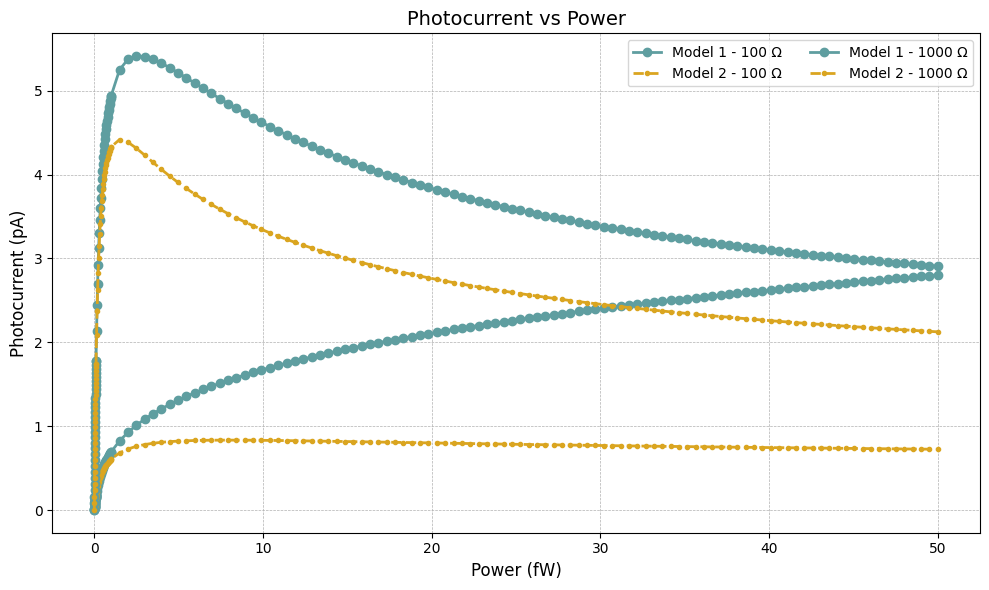

In [418]:
import matplotlib.pyplot as plt

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']  # Color per impedance
markers_model_1 = 'o'  # Circle for Model 1
markers_model_2 = '.'  # Cross for Model 2

plt.figure(figsize=(10, 6))

for i in range(len(impedance)):
    color = colors[i % len(colors)]
    
    # Model 1
    plt.plot(power * 1e15, photo_current_model_1_list[i] * 1e12,
             label=f'Model 1 - {impedance[i]} Ω',
             marker=markers_model_1, linestyle='-',  color='cadetblue', linewidth=2, markersize=6)
    
    # Model 2
    plt.plot(power * 1e15, photo_current_model_2_list[i] * 1e12,
             label=f'Model 2 - {impedance[i]} Ω',
             marker=markers_model_2, linestyle='--', color='goldenrod', linewidth=2, markersize=6)

plt.xlabel('Power (fW)', fontsize=12)
plt.ylabel('Photocurrent (pA)', fontsize=12)
plt.title('Photocurrent vs Power', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend(ncol=2, fontsize=10)
plt.show()



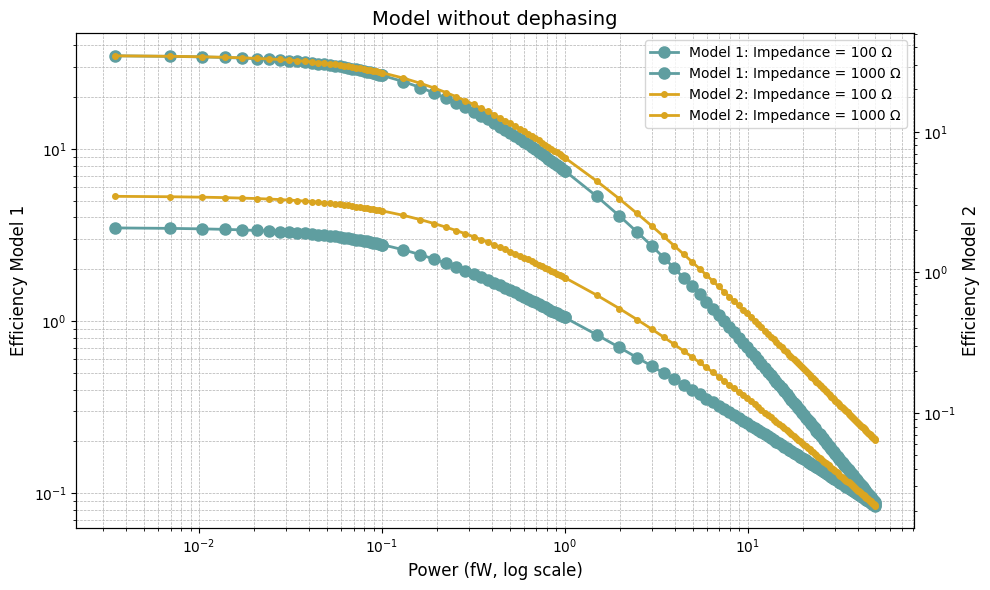

In [370]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

for i in range(len(impedance)):
    # Plot Model 1 on left y-axis with circle markers.
    ax1.plot(power * 1e15, efficiency_list_model_1[i], 
             linewidth=2, marker=markers_model_1, markersize=8,
             label=f'Model 1: Impedance = {impedance[i]} Ω', color='cadetblue')
    # Plot Model 2 on right y-axis with cross markers.
    ax2.plot(power * 1e15, efficiency_list_model_2[i], 
             linewidth=2, marker=markers_model_2, markersize=8,
             label=f'Model 2: Impedance = {impedance[i]} Ω', color='goldenrod')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Power (fW, log scale)', fontsize=12)
ax1.set_ylabel('Efficiency Model 1', fontsize=12)
ax2.set_ylabel('Efficiency Model 2', fontsize=12)
ax1.set_title('Model without dephasing', fontsize=14)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
fig.tight_layout()

# Combine legends from both axes.
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.show()


In [419]:
def tunneling_rate(coupling_dqd_resonator,resonator_impedance, tc, nc, k_photon_process=2):
    rho = coupling_dqd_resonator**2 * np.pi*resonator_impedance/(const.h/const.e**2)
    bessel_order = np.reshape(np.arange(0,k_photon_process, 1), [k_photon_process,1])
    para = 2*np.sqrt(rho*nc)
    Jk = scipy.special.jv(bessel_order, para)
    Jk_2 = Jk**2
    sum_Jk_2 = np.sum(Jk_2, axis = 0)
    return sum_Jk_2*2*tc**2
power = np.linspace(0, 0.1e-15, 30)
power_higher = np.linspace(0.1e-15, 1e-15, 30)
power_higherer = np.linspace(1e-15,5000e-15, 100)
power = np.hstack((power, power_higher, power_higherer))

nc = get_photonnumber(power, fdrive, fr, kappa, kappa_c, self_Kerr, gamma_phi_kerr, freq_unit='GHz')
tunnneling_rate_list = []
for i in range(len(impedance)):
    gamma_r = tunneling_rate(resonator_dqd_coup, impedance[i], tc, nc, 2)
    tunnneling_rate_list.append(gamma_r)

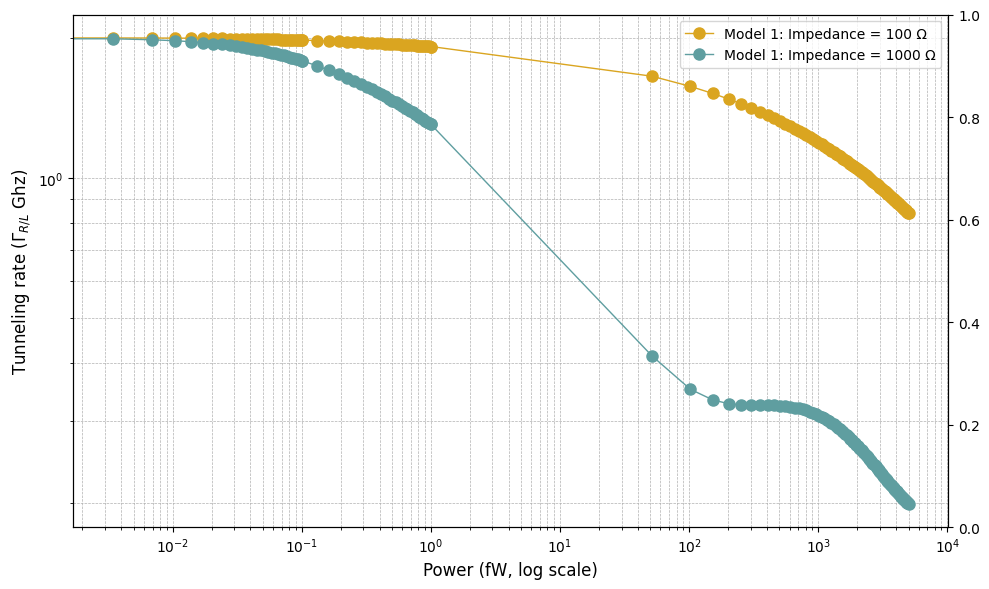

In [420]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
colors = ['goldenrod','cadetblue']
for i in range(len(impedance)):
    # Plot Model 1 on left y-axis with circle markers.
    ax1.plot(power * 1e15, tunnneling_rate_list[i], 
             linewidth=1, marker=markers_model_1, markersize=8,
             label=f'Model 1: Impedance = {impedance[i]} Ω', color=colors[i])

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Power (fW, log scale)', fontsize=12)
ax1.set_ylabel(r'Tunneling rate ($\Gamma_{R/L}$ Ghz)', fontsize=12)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
fig.tight_layout()

# Combine legends from both axes.
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.show()
